# Cycling - B - myrides_01_dataset_1.csv

## Content

In the following, we'll be examinen the realtionship between the dependent variable "km" and the dataset at hand. To do this, the following steps will be covered:

1. **Data Analysis**
2. **Feature Engineering**
3. Feature Selection
4. Model Building

In this file, we'll deal with part one and two, i.e. *Data Analysis* and *Feature Engineering*.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from IPython import display
from base64 import b64decode

dataset1 = 'myrides_01_Dataset_1.csv'

print(os.getcwd())
os.chdir('/Users/christianbinkert/Documents/CAS/Machine_Learning/Seminararbeit') #Your path

dataset1 = pd.read_csv(dataset1, delimiter=';')


/Users/christianbinkert/Documents/CAS/Machine_Learning/Seminararbeit


### 1. Data Analysis

Within the Data Analysis, we try to get an overall idea of the dataset at hand. This will help us in the following steps to make the right decisions.

1.1 Data types and missing values

1.2 Distribution of the Numerical Values

1.3 Outliers of numerical variables

1.4 Categorical Variables

1.5 Relationship between independent and dependent feature (km)

### 1.1 Data types and missing values

First, we try to get a feeling of the data. Also, we want to understand how much of the data is missing.

In [5]:
print(dataset1.dtypes)
dataset1.tail()

HR                   object
Hm                   object
km                   object
maxHR                object
maxHm                object
max_speed            object
minHm                object
position_lat_max     object
position_lat_min     object
position_long_max    object
position_long_min    object
speed                object
bike                 object
type                 object
date                 object
endtime              object
starttime            object
rider_weight         object
rider_height         object
ride_type            object
duration             object
dtype: object


,HR,Hm,km,maxHR,maxHm,max_speed,minHm,position_lat_max,position_lat_min,position_long_max,...,speed,bike,type,date,endtime,starttime,rider_weight,rider_height,ride_type,duration
563,NaN,"152,2","35,06996",NaN,"328,4","39,2688",238,"48,79826143","48,70362296","9,517389117",...,"23,69746595",Stevens Elite,Trecking,02.07.18,08:06:03,06:39:04,73,183,Pendeln,01:26:59
564,NaN,"286,4","35,00172",NaN,"383,8","39,2688","255,4","48,7983051","48,70363587","9,517290127",...,"23,74666134",Stevens Elite,Trecking,04.07.17,20:06:00,18:39:14,73,183,Pendeln,01:26:46
565,NaN,209,"36,76133",NaN,"341,6","36,378","245,4","48,79818147","48,70364903","9,523466332",...,"21,8650275",Stevens Elite,Trecking,27.08.18,18:56:33,17:15:40,71,183,Pendeln,01:40:53
566,NaN,"238,8","35,03116",NaN,416,"41,8212","268,8","48,79824559","48,70364433","9,517298006",...,"23,70375719",Stevens Elite,Trecking,20.09.18,09:06:54,07:37:38,72,183,Pendeln,01:29:16
567,HR,Hm,km,maxHR,maxHm,max_speed,minHm,position_lat_max,position_lat_min,position_long_max,...,speed,bike,type,date,endtime,starttime,rider_weight,rider_height,ride_type,duration


In [6]:
print(len(dataset1.index))
print(dataset1.isnull().sum())

568
HR                   524
Hm                     0
km                     0
maxHR                524
maxHm                  0
max_speed              0
minHm                  0
position_lat_max       0
position_lat_min       0
position_long_max      0
position_long_min      0
speed                  0
bike                   0
type                   0
date                   0
endtime                0
starttime              0
rider_weight           0
rider_height           0
ride_type              0
duration               0
dtype: int64


We notice the following:

1. Row 567 repeats the column headsers. This row will be dropped.
2. "rider_height" has a constant value. As this will tell us nothing about the relation to the dependent variabel, the column will be dropped, too.
3. Every column is an object / string type. Hence, we will convert this data into float or datetime data. 
4. The columns 'HR' and 'maxHR' mostly show NaN data, 'maxHR' is thereby a result/maximum value of 'HR'. Dropping the **rows** that contain the missing values is not an option, as it would affect the majority of the dataset. An alternative is imputation by taking the mean. This will be done in a later step.


Besides the above mentioned points, no missing values are detected.

In [12]:
#1. As well as the last column that repeated the column headers
dataset1.drop(dataset1.index[567], axis=0,inplace=True)
#2. We drop the column"rider_height"
dataset1.drop(['rider_height'], axis=1, inplace=True)

In [13]:
for column in dataset1.columns:
    dataset1[column] = dataset1[column].str.replace(',','.')

In [14]:
#Chaging respective columns into float-type
dataset1[['HR','maxHR','Hm','km','maxHm','max_speed','minHm','position_lat_max','position_lat_min','position_long_max','position_long_min','speed', 'rider_weight']] = dataset1[['HR','maxHR','Hm','km','maxHm','max_speed','minHm','position_lat_max','position_lat_min','position_long_max','position_long_min','speed','rider_weight']].astype(float)

#Changing respective columns to datetime
dataset1['starttime'] = pd.to_datetime(dataset1['starttime'], 
 format = '%H:%M:%S')

dataset1['endtime'] = pd.to_datetime(dataset1['endtime'], 
 format = '%H:%M:%S')

#Calculating the delta between start and end time
dataset1['delta_seconds'] = (dataset1['endtime']-dataset1['starttime']).dt.total_seconds()

dataset1.drop(['starttime','endtime','duration', 'date'], axis=1, inplace=True)


dataset1.dtypes

HR                   float64
Hm                   float64
km                   float64
maxHR                float64
maxHm                float64
max_speed            float64
minHm                float64
position_lat_max     float64
position_lat_min     float64
position_long_max    float64
position_long_min    float64
speed                float64
bike                  object
type                  object
rider_weight         float64
ride_type             object
delta_seconds        float64
dtype: object

3. Convert data into float / datetime

- 'Endtime' and 'starttime' are converted into datetime
- Since the 'duration' is just the delat between 'endtime' and 'starttime', the column 'delta_seconds' is added. The greater granularity in seconds might help us uncover possible relations between the dependent and independent variable. Once we have those values, we'll drop the variables "starttime", "endtime" as well as "duration".

A futher point of investigation could be to examine whether the above mentioned times help us to predict the dependent variabel. This might be the case if rides on the weekend are longer and have an influence on the Hm covered.

In [17]:
from sklearn.impute import SimpleImputer

4. We now try to make sense of the Nan values by imputing the missing data fields by the median. Whether we can make sense of the imputed values will be evaluated at a later point.

In [27]:
#Imputation of 'HR' with Median
imr1 = SimpleImputer(missing_values=np.nan, strategy='median')
imr1 = imr1.fit(dataset1[['HR']])
dataset1['HR'] = imr1.transform(dataset1[['HR']]).ravel()

#Imputation of 'maxHR' with Median
imr2 = SimpleImputer(missing_values=np.nan, strategy='median')
imr2 = imr2.fit(dataset1[['maxHR']])
dataset1['maxHR'] = imr2.transform(dataset1[['maxHR']]).ravel()

In [28]:
dataset1.head()

,HR,Hm,km,maxHR,maxHm,max_speed,minHm,position_lat_max,position_lat_min,position_long_max,position_long_min,speed,bike,type,rider_weight,ride_type,delta_seconds
0,165.0,134.8,4.95890,165.0,283.4,30.9024,210.0,48.717270,48.713122,9.517255,9.490417,13.871984,CUBE AIM RACE,MTB,74.0,Training,2160.0
1,165.0,329.2,11.10381,165.0,534.4,40.0752,341.4,48.743777,48.713967,9.517455,9.489273,16.860246,CUBE AIM RACE,MTB,74.0,Training,2994.0
2,165.0,388.2,16.05416,165.0,455.4,41.1804,267.2,48.746834,48.713944,9.517421,9.480477,17.175754,CUBE AIM RACE,MTB,74.0,Training,3813.0
3,165.0,450.2,22.26266,165.0,468.6,39.9060,235.0,48.777459,48.713895,9.531489,9.480473,17.402926,CUBE AIM RACE,MTB,76.0,Training,4985.0
4,165.0,202.4,14.16321,165.0,373.2,29.8944,283.2,48.717166,48.703170,9.536965,9.477966,12.462230,CUBE AIM RACE,MTB,76.0,Training,5094.0


So far, we have not addressed geo-location (maximum/minimum latitude and longitude) in the dataset. Geolocation data should be used because it may contain valuable information that we cannot derive from any other feature.

For example, if the number of kilometers traveled is the same, a relatively small distance between the two points could indicate a particularly curvy route and thus a route with many serpentines. 

In order to make the data usable, we must first clarify how the area between the two points is to be interpreted. This is supported by the illustration below.

First of all we have to notice that the coordinates do not contain start and end points but only the maximum and minimum values. Within these values the driver can have moved freely. For example, he could have simply moved from the minimum values to the maximum values. It is also conceivable that he has reached the maximum values at any point of the outer limits (illustrated by the trapezoid). 

Since it is up to us to make the coordinates usable, I chose to calculate the Haversine distance between the two points. 

In essence the Haversine Distance can be defined as the angular distance between two locations on the Earth’s surface, i.e. taking into account, that the earth is not a flat surface.

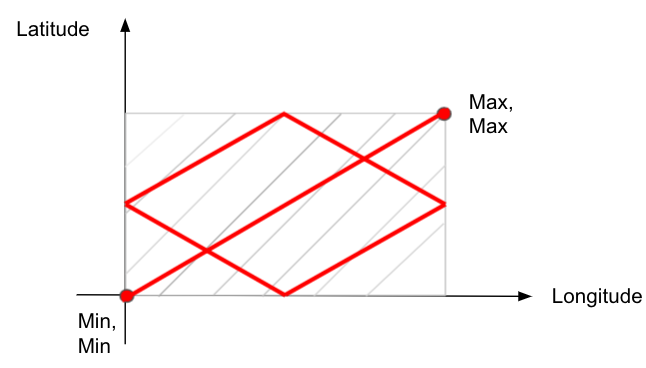

In [29]:
base64_data = 'iVBORw0KGgoAAAANSUhEUgAAAoYAAAFwCAYAAAAlqbrgAAABSGlDQ1BJQ0MgUHJvZmlsZQAAKJFjYGASSSwoyGFhYGDIzSspCnJ3UoiIjFJgf8rAySDKwMtgyWCemFxc4BgQ4ANUwgCjUcG3awyMIPqyLsiswA4Dh9xbvxj27Zs578fKx3KY6lEAV0pqcTKQ/gPEackFRSUMDIwpQLZyeUkBiN0BZIsUAR0FZM8BsdMh7A0gdhKEfQSsJiTIGci+AWQLJGckAs1gfAFk6yQhiacjsaH2ggCPU2peoIJ7uJG5mSkB55IOSlIrSkC0c35BZVFmekaJgiMwlFIVPPOS9XQUjAyMDBkYQGEOUf05EByWjGJnEGL5ixgYLL4yMDBPQIglzWRg2N7KwCBxCyGmsoCBgb+FgWHb+YLEokS4Axi/sRSnGRtB2DxODAys9/7//6zGwMA+mYHh74T//38v+v//72Kg+XcYGA7kAQAvoGIy/DCleQAAAFZlWElmTU0AKgAAAAgAAYdpAAQAAAABAAAAGgAAAAAAA5KGAAcAAAASAAAARKACAAQAAAABAAAChqADAAQAAAABAAABcAAAAABBU0NJSQAAAFNjcmVlbnNob3TR/5mmAAAB1mlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNi4wLjAiPgogICA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogICAgICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgICAgICB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyI+CiAgICAgICAgIDxleGlmOlBpeGVsWURpbWVuc2lvbj4zNjg8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpQaXhlbFhEaW1lbnNpb24+NjQ2PC9leGlmOlBpeGVsWERpbWVuc2lvbj4KICAgICAgICAgPGV4aWY6VXNlckNvbW1lbnQ+U2NyZWVuc2hvdDwvZXhpZjpVc2VyQ29tbWVudD4KICAgICAgPC9yZGY6RGVzY3JpcHRpb24+CiAgIDwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cm0VdpoAAEAASURBVHgB7J0HuCRVmf7PvZOHGYYBhiEzODBITgOSlCFIUgkCIiCgi8Ciggv8d901rWH18RHQ1dUVA4uIhCFJEsmOioICM+QchjiBzOR4/9/vnDk9p2v65g5V3e/3PPd2dXd1VZ33VHe99YX3a+swczIhIASEgBAQAkJACAiBlkegveUREABCQAgIASEgBISAEBACHgERQ50IQkAICAEhIASEgBAQAh4BEUOdCEJACAgBISAEhIAQEAIeARFDnQhCQAgIASEgBISAEBACHgERQ50IQkAICAEhIASEgBAQAh4BEUOdCEJACAgBISAEhIAQEAIeARFDnQhCQAgIASEgBISAEBACHgERQ50IQkAICAEhIASEgBAQAh4BEUOdCEJACAgBISAEhIAQEAIeARFDnQhCQAgIASEgBISAEBACHgERQ50IQkAICAEhIASEgBAQAh4BEUOdCEJACAgBISAEhIAQEAIeARFDnQhCQAgIASEgBISAEBACHgERQ50IQkAICAEhIASEgBAQAh4BEUOdCEJACAgBISAEhIAQEAIeARFDnQhCQAgIASEgBISAEBACHgERwxY8EZYsWdKCo9aQhYAQEAJCQAgIge4QEDHsDqEmfP+KK65owlFpSEJACAgBISAEhEB/ERAx7C+CBfv8TTfd5CZPnlywo9bhCgEhIASEgBAQAvVAQMSwHijnaB94C3//+9+7V199NUdHpUMRAkJACAgBISAE8oBAVYjhgw8+6CZOnOjOOOOMmo3pkUceKdv2N77xDb/Pp59+uuz1N954w82cObPstWo9Of74490uu+xSrc3VfTvz5s1zl112md+vvIZ1h187FAJCQAgIASGQewSqQgznzp3rHnjgAffMM89UfcAUSnzkIx9ZhXROnz7d73PBggWlfd54441uwoQJ7sknnyy9Vs2Fxx9/3N1///3V3GRdtwUZ7Ojo8Pv87W9/W9d9a2dCQAgIASEgBIRA/hGoCjGs5TAhfjfffPMquzj77LN9SPR973tf6b0//vGP7u233y4910I5ApdffnnphWnTpjn+ZEJACAgBISAEhIAQiAjknhjGA80+brfddu6QQw5xI0eOzL6l5xUQeOGFF9wdd9xReqetrU1FKCU0tCAEhIAQEAJCQAiAQMOIIWHnf/qnf3K77babGzNmjNtqq63c4Ycf7v7yl7+UZubWW291H//4x/3zhx9+2B100EHuf//3f/3z888/3z9//vnn/fMTTjjBXXvttX753/7t3/x7c+bMcYSc+dy5557r30v/3Xvvvf69Sy65JH3ZvfXWW+68885z++yzj9t4443dMccc45566qmyddInf/rTn/xx4r3kj2P+29/+lq7S8OVsTiEh5ey4G36QOgAhIASEgBAQAkKgoQg0hBjecMMNbocddnBUyA4dOtQdeuihjpDx9ddf7/bee293++23e1AGDBjghgwZ4pfb29v98sCBA/1zilEgjpA/bPDgwY71sUGDBpU+x/usB7HM2qxZs/x7zz77bOmtpUuXemL3r//6r478xoMPPtg99thjbvfdd3evvPJKab248L3vfc/tu+++7u6773Yf+tCH3Ac/+EFPCln+n//5n7hawx8rkcDXXnvNj7/hB6cDEAJCQAgIASEgBPKBgHmO+m3m5aOioePAAw/s0ba22WabDgtldtx3331l63/nO9/x2zn66KNLr7/77rv+NSOMpddYOOmkk/zrVhFdev2ss87yr1muYek1I4T+tU996lOl1+LCdddd59/7+te/Hl/qOOecc1Z5zQhih1Uk+9cZZzS2bWS0Y9NNN+14/fXX48sds2fP7th22207jPR2mEez9HqjFswzWjp2jj/+ceyf+cxnGnVY2q8QEAJCQAgIASGQMwTq7jGcP3++O+WUU9xPf/pTLzdjJKVkxx13nF/Gk9coQ85lvfXWc1/5yldKh4CXktA13s3U8BYuW7bMff7zn3drr7126S1C46effrpbuHCh+/GPf1x6vVELhJHxuGaNY8eTuHjx4uxbei4EhIAQEAJCQAi0IAIhLlvHgQ8fPtydeeaZfo/Lly935AiSv/fEE0+4P//5z/51CFUjzLx+bsaMGe5jH/uYD02nxzB27FifBzl16tTSy4SYMcZx4YUXll5n4Z133vHPGVejDWkajrGSETqHOJKjKRMCQkAICAEhIARaG4G6E0Pgfvnll91Xv/pVd9VVV/ncQl4jP3DXXXdlsWEWSdy6665b8Rg22GADlxLD5557zq9HsUtnFotjOnu/1q+j7Qjh7cxidbKIYWcI6XUhIASEgBAQAq2DQN2JoeUMuv3228+LYVN0YnmJPqRseYe+kKQzUtbfKbEQ/iqbyGoebrLJJn4dqpIrGZ1DUltzzTV9KJnuK5VCtawbC2LSz9VzGW/ghhtuWNrle++95xAkX3/99Uuv4fmksCZdr/SmFoSAEBACQkAICIGWQaDuxJAKYaRqyCe89NJLy4COXUXIfauWDRs2zG+K3MaspdXIvAcxJFeQimeIJN60aIRis5I1dFl56aWXfNgYYpsaeZL0JLYiFEcYulGW7XDy7W9/2+c94rWVCQEhIASEgBAQAkIgRWDVioT03Rosxz7GkbDFXSAN8/3vf98/ZTlalKuJsjTx9UqPldalEARv3l//+levTxg/R3g17QQSX99///0dHkCkdFKDYL366qvpS+7YY4/1z7/85S+vksN32mmnuZNPPtlvq+xDeiIEhIAQEAJCQAgIgZwiUFWPocnPeFHozsZKyzrCyOgM4i0knImIdCRi9FtebbXV3BtvvFHaBGRvjTXWcCZL40yixq//6U9/uvR+uhDD0F/60pfcLbfc4r75zW96DyAdUm666SYftiaXjlAx1cfsK2sIaNMqjn09+uij7gMf+IBDCBvBa44jFpXwOZN6cRdddJEjjw8tQwS78TQitI1WIxqIJnOT3YWeCwEhIASEgBAQAkIgnwhUQz4n6hjaCEsaeZWW476MlHWYJ6+0rsnBdBx11FEdlufWceSRR/rXH3roobh6h5GvjlGjRvnXTUDav15Jx9BIWwfvo5HI/u+8806/LhqDVmncYZ5D/7qRzQ4LZXdYaNg/T3UM+YCFuv365tX07xuB7PjJT37Scdhhh/nnfqMr/pkwd4eJYXdYtbV/j/2yf8ZjHsZ01Vwsf+tb3+qwcHkujkUHIQSEgBAQAkJACOQLgTYOx8hM3Y1wMf17Fy1a5LbYYotV5GGyB8RhIiVDDiBdTroyws5sN9UWZH2KLqgkfv/731/qjNLVdujGEtePHVc6W5/jowKZfdMWb/XVV+9s1Ya+HnMMu6pUbugBaudCQAgIASEgBIRAwxCoaii5N6MgnEzxRk+NQpC0krarz40cOdLxl7URI0a47bffPvtyp8/Jg8wWlXS2Msc3fvz4zt7W60JACAgBISAEhIAQyD0CdS8+yT0iOkAhIASEgBAQAkJACLQoAiKGLTrxGrYQEAJCQAgIASEgBLIIiBhmEdFzISAEhIAQEAJCQAi0KAIihi068Rq2EBACQkAICAEhIASyCIgYZhHRcyEgBISAEBACQkAItCgCIoYtOvEathAQAkJACAgBISAEsgiIGGYR0XMhIASEgBAQAkJACLQoAiKGLTrxGrYQEAJCQAgIASEgBLIIiBhmEdFzISAEhIAQEAJCQAi0KAIihi068Rq2EBACQkAICAEhIASyCIgYZhHRcyEgBISAEBACQkAItCgCIoYtOvEathAQAkJACAgBISAEsgiIGGYR0XMhIASEgBAQAkJACLQoAiKGLTrxGrYQEAJCQAgIASEgBLIIiBhmEdFzISAEhIAQEAJCQAi0KAIihi068Rq2EBACQkAICAEhIASyCIgYZhHRcyEgBISAEBACQkAItCgCIoYtOvEathAQAkJACAgBISAEsgiIGGYR0XMhIASEgBAQAkJACLQoAiKGLTrxGrYQEAJCQAgIASEgBLIIiBhmEdFzISAEhIAQEAJCQAi0KAIihi068Rq2EBACQkAICAEhIASyCIgYZhHRcyEgBISAEBACQkAItCgCIoYtOvEathAQAkJACAgBISAEsgiIGGYR0XMhIASEgBAQAkJACLQoAiKGLTrxGrYQEAJCQAgIASEgBLIIiBhmEdFzISAEhIAQEAJCQAi0KAIihi068Rq2EBACQkAICAEhIASyCIgYZhHRcyEgBISAEBACQkAItCgCIoYtOvEathAQAkJACAgBISAEsgiIGGYR0XMhIASEgBAQAkJACLQoAiKGLTrxGrYQEAJCQAgIASEgBLIIiBhmEdFzISAEhIAQEAJCQAi0KAIihi068Rq2EBACQkAICAEhIASyCIgYZhHRcyEgBISAEBACQkAItCgCIoYtOvEathAQAkJACAgBISAEsgiIGGYR0XMhIASEgBAQAkJACLQoAiKGLTrxGrYQEAJCQAgIASEgBLIIiBhmEdFzISAEhIAQEAJCQAi0KAIihi068Rq2EBACQkAICAEhIASyCIgYZhHRcyEgBISAEBACQkAItCgCIoYtOvEathAQAkJACAgBISAEsgiIGGYR0XMhIASEgBAQAkJACLQoAiKGLTrxGrYQEAJCQAgIASEgBLIIiBhmEdFzISAEhIAQEAJCQAi0KAIihi068Rq2EBACQkAICAEhIASyCIgYZhHRcyEgBISAEBACQkAItCgCIoYtOvEathAQAkJACAgBISAEsgiIGGYR0XMhIASEgBAQAkJACLQoAiKGLTrxGrYQEAJCQAgIASEgBLIIiBhmEdFzISAEhIAQEAJCQAi0KAIihi068Rq2EBACQkAICAEhIASyCIgYZhHRcyEgBISAEBACQkAItCgCIoYtOvEathAQAkJACAgBISAEsgiIGGYR0XMhIASEgBAQAkJACLQoAiKGLTrxGrYQEAJCQAgIASEgBLIIiBhmEdFzISAEhIAQEAL9QODMM890EydO9H8333xzl1u66aabSuted911Xa6rN4VAPRAYWI+daB9CQAgIASEgBFoFgWeeecY98MADfrgXX3yxO+SQQzod+oUXXlha9/XXX+90Pb0hBOqFgDyG9UJa+xECQkAICIGWQmDUqFHu97//vZs/f37Fcb/33nvuD3/4gxs8eHDF9/WiEGgEAiKGjUBd+xQCQkAICIGmR+Dwww938+bNc52Fk3/3u9+5RYsWuYMOOqjpsdAAi4OAiGFx5kpHKgSEgBAQAgVC4BOf+IQ/2iuvvLLiUV9xxRVu88039zmGlVbAo/ilL33J7bvvvm799dd3m266qTvggAPcr371K9fR0VH6yBlnnOHJ5bXXXlt6jQU+f8QRR7iPfOQj7tVXXy17T0+EQGcIiBh2hoxeFwJCQAgIASHQDwQ22WQTt9tuu1UMJ7/xxhvujjvucMcee2zFPTz//PNu2223deedd557++23fZ7immuu6T9zyimnuK9//eulz51wwgnuzjvvdKeeeqqbPXt26fXPfe5zjoKWXXbZxW2wwQal17UgBLpCQMSwK3T0nhAQAkJACAiBfiBwzDHH+BxDcg1Tu+aaa9zSpUvdJz/5yfTl0vIPfvAD99JLL7lzzz3XTZs2zXsJKWi5++67/To///nPS+vuuuuu7mtf+5p788033Re+8AX/+mWXXeYuvfRS96EPfci/V1pZC0KgGwREDLsBSG8LASEgBISAEOgrAkcffbRra2tzV111VdkmCCNvv/32bssttyx7PT7ZY489PKGLRC99fdy4cQ6P4/Lly+PL7itf+Yrbfffd/X5+9rOfObyFa621lieHAwYMKK2nBSHQHQKSq+kOIb0vBISAEBACQqCPCBDC3WuvvUrh5OHDh7sZM2a4P//5z+673/1up1s97rjjSu+x/hNPPOGefvppd++99zpkbcgxpHBl2LBhfj3I3yWXXOJ22GEHTwp58YYbbnAbbrhhaTtaEAI9QUAew56gpHWEgBAQAkJACPQRgWw4mWIUiF1nYWR2A+n76le/6saOHesLT/bbbz93+umnu/vvv79TeZvx48e7WPCCV1HVzn2csBb/mIhhi58AGr4QEAJCQAjUFoGjjjrKtbe3u1idPHnyZB/2pTilMzvxxBPdd77zHe/xw7NIcQnh40cffdStu+66FT8GafzNb37jhg4d6qZPn+6++c1vVlxPLwqBrhBQKLkrdPSeEBACQkAICIF+IoDXb++99/Zi1k899ZQPB//oRz/qdKtUFkMikae55557yjyEFKw8++yz/rPLli0rbQMR7eOPP94/v+uuu9xnP/tZ973vfc8dfPDBbs899yytpwUh0B0C8hh2h5DeFwJCQAgIgUIisGTJEvfWW2/56l5y9B5/7DG/TPXuooULnVVv1G1chJMRuz7ttNO89zCGfCsdwMyZM/3LAwcOdIMGDSpbhSplxoXFR5bPOeccn4P47//+794bedFFF/GyQ8pmzpw5fpl/FKwgf/POO++UXtOCEEgRkMcwRUPLQkAICAEhUHgEyN+DDD1t3rmnnnzSvfPaa27RK6+4diNUq220kdtw9Gi3pf2tY1XBw6wqmKrhWtuRRx7ppWT+9Kc/uf3339/nDna2TyqVCTPTc/nTn/60g1QynltuucWHitdZZx2vV0hoebSN46abbnIXXHCB1z1EtgZDwubss8/2cjdnnnmmi0QRj+VWW23lw9EUtciEQBYBEcMsInouBISAEBAChUUAj9gs87jdayHYR/74RzfwoYfcBkaqxlsXkMEWen17tdXcwMWL3TILyc60jiCDrGvI+tZ9pNaSLmuvvbbvYHLbbbd1KmodQcdLSLu8k046yRNB8gYhrzvvvLP729/+5u677z5HtxP6LNOP+eSTT3Z4FyF/ad/lb33rW+766693v/71r91HP/pRBzmVCYHuEGizO6uVfXW6W1vvFx6Bb3/72+7HP/6xlzso/GA0ACEgBIRABgGkXG65+Wb3iLWHm2jesT3NU7iBhXAr2VPWZu4Z88ht/8//7DYyT2LejMvzK3b85BxOmDDBjRw5siqHiFQOoWcIpkwIZBGQxzCLiJ4LASFQGwQWLHDW6sHZ1a0229dWWx4Bwq1///vf3YNWfLG7hZCPMt2/rmy9WbPcy9aW7r73vc8NP/xwLwjd1fr1fg8vIYS1mqQVsnnxxRerIKXek1mg/an4pECTpUNtXQT4MS+sc9/Cdu6FF5wzL4678cawzGsyIVBlBF599VU31YjhGPMU7tqD/LnVLbQ86uWX3TMWdn7SiGQrGN5HKpu7EtduBRw0xs4RkMewc2ya8h3yT3bccUeFkgs2u5EU1iNJvlrQWJ6KG2SVj8MeecQNNg02a/XgrBzTWRsIt9SkO+Zvu61bNGZMtXan7QgBN8OKTDqMHO5oRRkbm/ewJ7bUzsm3TOrlTftMKxjSOXgMZUKgMwREDDtDpklfJ0eFKjfyVoYMGdKko3Ql71qRiFSlySCRfrF51/gjuRzhWoRy825t777rBjz+uBtunphBVgAw+PnnVx6yEcWl1qprzr77urkf/KBbvsUWrsMS84tudKpAS47vFW3PmsG4IWFcnH8URHD+5fY7ZdgvnjbNbTl1qtvWCGJPbTXGZnmJ75iEi0wICAHnRAxb7CyAVIwwckiFHH/NaFzMCJXwCJkqApGqNA+Qwrlz53odNi7Ka665pq9ArHX1ZKVj6fFrdrzuuedc+1//6gZaVeWAf/wj5BVmNjDUvDobXH65W2a6cksPPdQtN5LorDLUBphZsxhPF5omHjdbGN8rvDJFN74/6O6h+UekIZ5/ufs+kbdqRLDNOoJsaJ7pDjunRvFaD81XX9rvYlsBbrh6OCStJgT6hYCIYb/gK+6HIRex+XpxR7HqkXMxw7sBMWSMeDhyTaRWHYJ/hY4GJNK/a543xrTeeut5vbLcjsW8Ss5ytZwRQnfddc795S/OGEX56Ljw8hcv2syReXcGGJH0n7PkfzdpknPW49VcbuWfzfEzSCGVsAgpQwrRmCv6dyuSwvdM4oVzEaILMczd+WeYW/PgkL/6+9+7oSs6gvT0dEEmepada/OtxdxaTXqj3FMstJ4QiAiIGEYk9Fh4BGLYldAXXo0ik0IIIUnikRSuscYa+QzhGWlwVtlppaDOVHadswpPay1Rdi4tN29Tx/jxrn277Vwb6QsPP+ysp5czd2hYz8bqbr/dOdOb83mIprdmJZPOSjEtppHvnyhI4Us2XoSCIYW0MCt6GDmSwlk2r4wPorvWWmvly/POuWPiz87SFJx5nj05TM46OysdnsDuzp7Zpmn4pM3bELvxWt+ka2RCQAh0/70RRkKgEAhACmMuVPQUEkYumuHppFUVHihyubhYIWCbSyMny3K6nAn2OssZdNZyLLUOI+dLN9jALbUODO1HHOEGWbeHNguJe+8g1ckUo+AtjB5EI8Ju8mRnCr7OWXjZHXKIs0opZ+7SdLO5WW4VUoinMDfh4+iZvvtu5665xjkeM63dlliqzAtW1PS6rTvh9TfcmMXmza5gb9vvw732/XrFUhh23mEHT+orrKaXhEDLIVC8K2fLTZEG3B0ChLqyBRq5C3l1Nwh7H1JIOJI2V5BawsfVErTtwe57vgrVnnhrrLWXJ3LkEVq4O7VldmFeaB7CRfvt5waZB3C1rbdeSS4+9jHnJk4MXkIL/zkrUPFh6LgBQtL/+7/BG3TUUc4deKBzVqBibqu4RsMfW4UU5sZTaDd+drfk3L33Bs80NyMZz7QbMcKfJ0t32809a4RvinmmtzYJmp3NmzvaPIxD7PvVbufpIvtuvWPh44ft+/WgtYabYOfo3pbCUM0bMFrQ0aEEo/vIIdzkdGK0s/vGN77h3/3qV7/qDielQiYEGoiAiGEDwdeu+48AZApPIY+xareIpHCJ9XAlyZ8/qlrXtZynEVzo8mQIVL/4YvDSWGGJ9/wRBk7NQt5LrM/rnA98wC08+GA31AjgcPN4ruJxwgt44onOfehDwfNjrb2cVStb/DxsDaJpVc3u+993Dqkb8zg6u4A7C0k3WiBbpDCd8Dosc45ZQYlPU7jqKuesyKTMjOiZuy+cS3Yj0W5t4za2MPiW9h16ZbPN3Mt2EzN6+nQ31M7fAUYwF1je8TtGHJdss42baJ7CXXff3X/fyrbZzyf0OH7ggQf8VpCG6YoYXnjhhaV1iRTIhECjERAxbPQMaP99QoA8KDyFXKR5pGoSQrUKAenT1uv7IUghXkJIIflpkMJc5anZ8TnrPes9e4SArasEVaBlZsfdYSG5JXaRfefDH3YL7KI70nK38MJ0SdQpNPnCF5w1kXXOWpj5sDTeyCgdYvPrCShhajyUeBshk3yOfMU6m0hhHQHnRgRhdOb9yitDioEVlpWZfVecnXM+9cBSFdDFjLm5k/bZxy22XNUn7dx51SrGZxrBXGDbHGzpDO+zTic7WJrCZkYcyUWulXH+/9684sgYVfpOU9xDv2N+v4h6yIRAHhAQMczDLOgYeoUApBAPIRdpcgshhPzlVl+ti9Hh7YQUEkImbEz1Z64qWqkspp/qLbc4u4I5l20xtsJb02EX4MUWLnvbQsYLjSSuvvrq3ZPCiAsEj1xCvIF2MXfXXx/CyBSoQA4wqk8hpVSgGvF0H/lIIASWw2h3A2GdGv9vFVLY8JxC+25bNU8ggpwL3IhQ4JSaeaadCaS7Aw5w7uMfd85CwnyXIIXk6FKsxXcJwrWFpSHwe0GV/2t2Q8N6FAmNHj063WJNlgkL4zG82br+HEVaRMZ+Z553judQy6m9gTxdmRDIAQIihjmYBB1CzxGAFOJh4yLNMiQKjb+ikUKOnTEQOqICGSKFpxCCmwszT4b1CAsEjYIQikxSs8IYq4xxzvK5OowQLjYv3tsW+mZMvSKF6TYNA+855IKPVxAiSHEBXiNyzDAIw29+EwpXjjzSOQtXe4JglbO1tFYhhQ3PKcRTDPnnRoQq9+yNyBDz7m2+mXPWOccdc4xzVthkX5pOSWE8J0gzgQhG8hhfr/XjJz7xCU8MrzSPZyVieMUVV5h85+aWcjuxIjHEo/id73zH7s3u8y37+H1gfbZ78sknl373zjjjDEv7fcadeuqpxpONKK8wPn/SSSd5b+QvfvELtwE3UjIh0A0CIobdAKS384MAZIpwCz/uGKEZSGHRDC8nIS28GwgIc8FCEgTvRsPNQl6eiKFDSNUnuoTRaxcPbvSazu28k/fWdFhhyWILy71tF/R+kcK4bR5pkwfpszxF31+ZHst4LdPw9fTpzv33f4f8Q9bFc2QXTAMz3VJVlkUKqwJj1xtBfgYPcZSfYb5Twyu84Ya+naJVZwS9S84Ts0j2sp7C9OONWt5kk03s3mm3iuFkIgV3mLzTl7/85YqH97x1C9rHPOgIp29nhVzkKU6zGzQ+c7vJO71o+b7f/va3/WdPOOEEU3ja0zj1/dZxci//e8Ibn/vc50xW9Dr3n//5nyKFFVHWi5UQEDGshIpeyx0ClTQKi0oK6WaCpxByiPYdXpqGj4X8JutG4vMICd+R15UN340YaVWfE4K35pOfdB0W/l1s+Z1VJYXpmQcR+OxnAwmg6AAvEl5Mu6B6s327Bx8MkjcQikgYjKg606erhokUVgPFLrbBeUcVeio/E/NL48dMLsd7BqnsxUNseYHR8kwK4zEeY57Ne62amlzDo48+Or5s913X+BD3J+27dPXVV5dejws/+MEPvEbm+eef784+++z4sq92hgT+/Oc/LxHDXc1z+rWvfc0TwC9Yzi4eyssuu8xdeuml5nz/kH+vtAEtCIFuEBAx7AYgvd14BFJSWGSNQopkyHPCU0g4PBfdJAjRQrQQqCaH8NZbnUv7GjP9eDLJ/zNPhM/n2mMP12H5kHhvIYUQXJLsuy006cuphKdogpFRLoxWXOALVKhSpkCFcDeGfA55aFQ1xwIVjnXjjZ0x7rBOH/6LFPYBtJ5+xLz/Xn4mCqNz3lHxnhrkHpki8k6PO865nXZK3821pzA9UMggxO4qu7lJiSFh5O23395taVX8lWwP+56R7wnRS43Xx40b5z2G/DbGgruvfOUrdu90i9/Pz372M/cf//Ef/qYTcthlAVi6cS0LAUNAxFCnQa4R4IcPrwAkpMhyNJDCbDcTQsgNzY1EGBjpD4gWYWOIVWoxfEfVJ9XAVA6bzEwM6RO6gxT2Oacw3Vd3y5ZL6kPLEIVJk4KgNiSQ8CNV0xhSH4wDsoF3ib9ddgm5kGGNHv8XKewxVL1fEUKPFBFdcqg2zp53UX7mgx8MKQXmHbO7jrL9FMFTGA+YvD7Cu2l1Mp1y/mwC79/97nfjaqs8HgcZXmGs/4RVVz9tOZd4H4k48D0Eh1isBvm75JJL3A4mwUMIGaOgZUM87zIh0AsERAx7AZZWrS8CkCl++PCuFZkUUhGZq24m5HPhFYRYEaJFNDiSqzjFFuL2pIrQXRK+S0khEhyQQipA6+aRoBqV48F7BKFFIJs8SMSO8UJhlpPlLNHeTZnizEXj3EEHOff+9zuL2/u3u/snUtgdQn18n1xVckPpeAMhZN5W5AuXtmiVxF5+hhsRqs9pi5ixIpHCeOiEk/9iebsxnEyol+8SYeTOjHGSQ/jLX/7SRxnieltb5T/5yOQnZ228efYpTPm///s/71U8iHNfJgR6iYCIYS8B0+q1R4AfTEghF2geyb9DayyGTGp/BNXbA6Qw7WZC5TFkqiHGRZh8Li7IlpBuVypn4onlh4JnhtAW4TuqPi3UlRqeW0huQ0hheiAQCDwqhIwZCwUq9FpGbzEaFa3nnhs8U1RqIpBNgUoX+IsURvCq+Ij8DPNCJxAvP2P5oDNnlO+A8860Lz0ZRNbFyE8lKyIpZBxUJNMNBUJIOHmyVfrvbp54ilM6sxNNAJ71d7KboH/5l38xh/kHfOiZnOStTJ6HNI6sUXzyG6va5/dyupHwb37zm+6//uu/sqvpuRDoEgERwy7h0Zv1RgBS2CwahXg6IylEZqJh3UyMXPtCEkKseNisonGVdmKI/JLUT/iOCzMVwZkCjtyQwvSkJI/w9NMDkSWMTK4ahBDdQ4ziBsb91FPBg0gPZqROLEfLYnB+lfhPpDAiUcVHyMvUqaFwCPkh5iE1+1748445MU+XP+86EZwuKilkuOQT721jRMz6KcOAcPCPfvSjFImyZfKQIYXoLd5jLSNTxQJ+H58lhcKMG+do3Kwdf/zx/uldlnP7WSvc+t73vmcO9oN9xXJcT49CoDsERAy7Q0jv1w0BSCFkigsAuYXc9fKD2NA8vD6OnnFE4WrGASlcLUO0+rjp3n2MCzMahJBBvDV0EEnN8pLcxua12HOP0D2CC3QFTcBYaNJwT2F67HGZAhO0D+0i6vMg8SBSjMLFM4bbyKekuAaSgucQgWxy18i/MgxECiOYVXokXeG554L8jBVZuGw/7bb2gD3nXawmxwvciRWZFMYhEU7+o1XPn3baaT76Qci3M5u5wvNNCk1WseBc84Lz+4LFR5bPOeccn4NIv2W8kRdddJGjUAUpm4fMm57LvuscuCx3CIgY5m5KWvOAIIWQDy4AGAnV6V1ykVBhHCSH4y2k3zGkMCaI120cVOpSuUseoXke/IWZCuTUuBDjGSRn78ADA7FK31+xnJJCLi51zSmscDydvkRvaYSxCUNCcOkkQbicfMroWUGCx2Q8vDwKhMTGvtDyD1+yOSPBH/kgvDSV2pd1ut8cvsH3iRy0WTZeSC86mXURr8ZDS44n8jO0OAT/6L2NOCE/Y4LO/ryDoBPe78KagRQyvCNNb5MK4z/Zd3J/q7DHi9iZUalMmBnR6k9/+tOW1XGMVzSg6phQMfOJV5GbT4rYbjIx8AsuuMDuj7YtSdMgYUM1NESSMDZEUSYEeoKAiGFPUNI6NUUgytFAQPAO4mHL3iXX9ACqtHEuxlzEIIXk4ZFLyI8/46mbkeBPIUa8MJPXhbcstdhODPkXcu/I7erEsqSQi1DdCk06OaZuX7YcLHfYYaF4htAy+YcU2EBYooHRT37iPYsLzIM438jhOnZR3USkMCLUu0c7932+KjjTsQTcLcetzPCYIz1E/uqxx5pI+s7OvvBlq2SfpKQwV0Lw2QPtwXNuOva1yv7bbrvNhm/j78L4/aNdHl1LIIL88du4s2H2N/tO0wmFbieEppGJogsK3kXIX3pD/a1vfcsCBde7X//61+6jJkYPOZUJge4QaLOLmX2jZa2CAHeV65t8wkT7gVmflmYNtkgKuQBAOCBR/MAVzfgaEWaFFKJVmPZqrctYSPA3j5cnQORyEUpFsDo16xTjvTN406jWRcqFHK9ODFIIwcXzhKewEKSw0ljwGEaB7MceC7I2yXpL7SK82IpsBlpu5WCqONFsxPtYQOM8rLunEPkZhMeRn6F94sMPlyM3wL7Pm44LhUIQEwqGuDnpxrKkkJus/t4wEqLF07aRVTtzPufdmE86n3DME4xUKxyc9xlrjuMr3hW4OXDXKAyBVKMQUki4NffeqAozxzi4GEMKIYd4Bvjr70Wswq4qv0Rlcewvi3cs21826sKRU3fEEeHCTDivC8uSwtyGj7sYQ+ktOqF88YtBIJsCFQgMYfYVntSBlq81EPzoyYzHC6kUinCoGEXcuyBWd1KIdxpRauRnIN6V2ieSr4oOpnmrfNtCioV6YCkp5NwjdFq371MPjq9eq+AlhMTyJxMC9UJAxLBeSGs/ZQg0i0YhpDDtZhJzuepCcKOnZsoU564wT800K6xIjTAdXmHyCLkwEzruwQWmEiksohc3hcJc0SF0aZXXC42ozLVuEEONBK5mXtY28uIwCDaFKxRKkHNJ/pv1ufUYdhPyDBto3P+6kkLyNSmOsGpZX9CEniTe6tSQnyHXk3MO73QX6Qrpx1jOkkI8hWl4NLu+ngsBIVBdBEQMq4unttYNAlzAIilEdgEvAOHjImoUMo73jJwR5mGZIhO8GzUfi3klvXeLxH48YOQR8lpqo80juNOOwUuDRAsCzz2wpiSFybgXWuj8Jeue8qZpIG5kyfnDrUq57W9GcKabt9DOTW+vveYsWSsU7kBqKM4x3Tg3Zkyypfws1pUU4mWlyp0cQqrcCSGnhocV2aOYrgCxzsgCpatnl0UKs4jouRCoPwIihvXHvGX3yAUMMsiPP0QKLwCksIhyNIwjtrhjQsnXhBTW1PBsQVogglTcTpkS9AnTnY4Yaf1lJ4QLMwLVJPhbmL4nhvRFmlPIeArvKUwGXiZJY3mEa5o3qx0vIcUShOAfeKDc80Vu4vnnh9AzuXF4v6igrfU8J8fc3WLdSCGyP8jPcM4hP4M2ZFrljkcV6R+TR/GFP7RP7KLqttK4UlJY9EKTSuPTa0KgKAiIGBZlpgp+nFzAIB78+BN+hRBCDItKCuk6QE4hIeP1rH9wTbuZcAE2WQof4kSLzyQrvARLek4Ylo5cOnLjqDQmr4twXg8tJYVI7DQ1KUwlaSjIOfXU0H/56qsNW/OEPWVesNgRhqIeCCOaiKZB50nPpElWTLGpM02bHqJbm9XqQgq5GaGIiSp3q5L1+YQRmzgsiji4AcGzSn5mN/Iz8WPpY5YUVqPQJN2+loWAEOg5AiKGPcdKa/YRAS5ghCj58ceKrFEIgYrdTCC2hI9rWilI6I5KWvK4IC6PPFI+C+3twVMDEeSijBRIL6vNIymca6LEkEK8NU3rKUxJYUQSjyptAE0g2ItfQ4DAGzKIHiT27rtBJJy2exRbkLNJdS05mw2ooq8LKeRmJHbL4WaE4pzUIMZRfoaev73wTqebyZLCVi00STHRshBoJAIiho1EvwX2nZJCvIN4CotaXQiBetO8Jfwxjpp2M4mhu1jxSaK/7b/MjOR4yRkkVvDW9MFTw5jwflJV3ZKkMAUUokMolHxMcuSQ/UEgnBAqnkPM8km9YDjzATk85JBAiMxrXC+rOSmkqInWdUgeXX556EGdDg4iPW5cIMZ4p/FS91H6JUsK5SlMgdayEGgMAiKGjcG9JfZKyDh6CinIwFNYVE8U44gt7mhtxwWsJt0x8Kq+/HLII6RClgITPDepESKGvOAdJI9whx3Sd3u8nHoKo05hUeen0qDLcgoreQorfYjXkPKB9OEBQ9qG/tIQQUSxozFHpgnqw8sUqFDFzJwgrl1DqykptA4pJfkZvNPIz3CDktoY5Gd2CxXbjBlJnz6aSGEfgdPHhECNERAxrDHArbp5SCE//BAq8vDwsBWRdHAhZhyQQjxrECg8hYynqoYECO3aYugOQoJGXGrsk4pPPDQmxuxlaPrYf1mkMAW2k2W8gNZn1uNNezfyOwnlM0+YnRu+Kvf73w+hZzQi6cPMHNl5Um2rGSmM5x7kl6Imzj2KnFKzLj6+MpsCHHr80pu6HyZS2A/w9FEhUGMERAxrDHArbp6KYwghf5BBSFRddP2qDDYX4gUm4kuRCbI0tJ7CUziki24hfToEI5zuwQdDDhsSII8/Xr4ZQncbm2dmj91D8QNhToSD+2hUVFN9TE4h3s+WyynsLW6ETa3HrfUzC/JAt98eRMSZNwwvL5XiSLcQeibXkznCm1alG4iakUJyWDn3rE2b13B84okwpvifoiY6wdCDGkKI/Ew/i26ypFA5hRFsPQqBfCAgYpiPeWiao4hyNDwWmRTi8Ywt7si/W8tChGNMx66q+ZEUNtCBAzJx5ZWh6pgK5NSQ/ECgmhxCQndUw/bDmBc8nyKFvQQRgkTIHpIEQSTMT5UyBSp0AMHeeitI31DFjGcNgWyKgpBxoUioj1YTUkiIGDmeKVNCGzu8hem5h/yMtc70OZfoYDLmKuRRZkmhcgr7eFLoY0KghgiIGNYQ3FbaNBcvPIXkdUWNQjxrNRd7rgHIkEKIE8LVXMgghBDDqoXCYy5XlAAhlwvPTWpo5RGug2CQ4N+LzhHpZtLlSArp1BILTapKdNOdNWC5zzmFvTlWQsTkdjI3sUCFeYRkRWJFF5BLLgn5ocwdpJ71e6nrx2FVnRRSwIT8DOcc1dfclGRzWCkk2WmncCMCKTRB8GqYSGE1UNQ2hEDtERAxrD3GTb8HLl6QDi7MkCoIIX9F1CiE1KbdTPBorGnFCFUhuIaRbx1GP14qXqn65CKdGmE6qotj6G6XXZyBma7Rp2WRwj7B1vmHqAiH9OHNRRybP1rppbl506c796MfhXlGIPvDHw7yLj2s4K06KUR/kBxWjpV8SchsasPs3Jtg596kSc4de2wovqmSFI9IYQq0loVAvhEQMcz3/OT+6Lh4UcgAKWSZymO8UEUlheTe4SnEEK5G6LkqY+GifP/9oZUYVa5PP10+t1yACRPvuadzhx8eCh6ojq2CQQoZlzyFVQAzuwnCrSefHMjUVVcF8fEnLNfwjdfDmhR2kMNHyJkbAeYWjyNi5F0UDlWVFJKywPnG/i+7LBxPOg5yWMmHRJcxys9U6dxjNyKFKdhaFgL5R0DEMP9zlNsj5OJFgQk//BjyLUUNTUbyRKEJ3kEqjyk26bdFTTjy0SZPds5685YZuVzkbpHUT04aXiVEk6tkcVx4QWOhSVHnqBIkdQkfV9px+hr5g3h5zzorhP6pYKayFzKIMDZmqQk+J5Gq5ligAhGDkNmNVGpVI4WkLCCxgxYmPbUJH0fB7rhDPJ+ce8jzkMM6blx8pyqPkRTSPpIiJ+UUVgVWbUQI1BQBEcOawtu8GydkHEkhRIrK46ISDshT7GbCGKrSzWT+fOcIJaJDiCYcyf1ZTbiYywUZJJeL7htVtCwpJCRe1DmqBEsuSGF6YOYtd7vuGsLFkyat7GeNQLbdQHkjnw/iSEgXcWz++MyKbjVVIYXkOiKpwzlHygIk9ZVX0iN11sMx6C4ir0PXku22K3+/Cs8iKcRbLVJYBUC1CSFQJwREDOsEdDPtJiWFRdYoZE4Ig8duJuRFEj7Gs9ZngwCQZxY14fAURt27uFFrO+dbiUEeEKgm0b9KuVxxFyKFEYkGPFI4RDeaHXcMKQGkDuCtQ5fSvOzeyC395S9DVTAC2bZ+hxV5zDOv+yw7XyC9yLhQ9NSr/FaKmB5+OMjPUFySlT7COxnlZ9gvVdP9Od87gVeksBNg9LIQKAACIoYFmKQ8HSKkkB/9omsUgiljiN1MCIPjKexzNxO8NHiDKEAgsZ/estnkfiRPyC2LuVy0X6tGuDpzgogUZgBp1FOqkCniIG8UfUrOi2nTnJs5c+URIVd07rneq7fMvMZztt/eLbEq+HXsPOkVKcRDHeVnkD76m3kLly1duR9SFvBKQgQPO8x5+Zle9tReubGulyIpVPi4a5z0rhDIKwIihnmdmRweFxW7/OjjZSuyRmHMjSSfMHYzIfeJwpk+GXlkjz4aul+Qy4XHJjVy0NCy46KM+DHFBzW6KEdSSKEJnk+Fj9OJaNDyxhs7d/rpYd45P269NfQiRvcQQ0LGbijaHnvMjTBiONwI4kibu3Y8y92dk3wWDzUeSbQVp0xxpsjuN1v6hwcT7yU5hJBCWvfVyFJSSOGWcgprBLQ2KwRqiICIYQ3BbZZNQ6SaRaOQsRCmgxTi0ehXNxNyBskfI7k/5hHGXLI4+ST3IzlDaBE9O4oUamQpKcTzKVJYI6D7sllSBdCipPIcsWjCvFQJU6CyIvd0gD2OpIMK59RDD4WCELzKFCNROZw1iCUe6iiXw+dSg1Ryvk2aFPIIJ05cpdAlXb2/yyKF/UVQnxcC+UBAxDAf85Dbo4BIQTggU0XXKOT4Y4s7BKwhTohXDybE2xujCptk/uilocAkKxJMcj/FJHgHySOka0YNTaSwhuBWc9Pk89HrequtXIdpVS42D2KH3VgMsfOpjXQEjJzUyy8P5xcePgpUOH8s1cEblcWEoKP8DOHp1PBQU+1MCBv5GTQxLVexliZSWEt0tW0hUF8ERAzri3eh9gYpJGzMjz6kispjSFRVdP3qjATHDxnEUwjJXds8efz1qpsJmnRoHFJRSkEBPXMpKEhtyFDnNhsfLsaIGiMFUoPk/nSXIoUpGsVYXm4V6fOtq81bVuw0yEjimPvucwPtr6x6GKmZn/w0yNxwLuFp5FzCm4iHmhsT5JBSw0ON6DbSR3ip+9lCMd10Z8sihZ0ho9eFQDEREDEs5rzV/KghhVGOhp2Rf9drz1rNj7JnOyAMTs4dwtUQXao98RZSUd1js/7CXqgY6Q9yubLVnmyLXDJCf0jPEL6z/dTaWo0Uvs+KMvqcC1rryejh9rlJof825+NCyyNc57Ofde2f+ESQsaFAxXIN/Q0I2+swLyL5q4SJuRnB88e59/LL5XujVR+5g5BHCl4sV7EeJlJYD5S1DyFQXwREDOuLdyH2xoULUsgf3sEiaxRCCskl5CLMuJCjQVOtx15PwnbkgSFKTLUn3kLbTplRfYoWHSE/Evzr4KVh/5BCxgbpbZWcwqKTQm645lsFMZI0kKqSJI2lNLgzzwzEDp1DvNGEi5GfwRYsCJ1zwrOV/5GfodKdcPFRR4UbE4pW6mAihXUAWbsQAg1AQMSwAaDneZeRFPKjX3SNwuhNI3wMEdzA2pf1uJuJhZt9mJhwHRdqHuNFOk4g1Z7bbuscIsGE+iguqJNFUkhHk1YhhX2WEqrTnHS3G0ghnsJVSCE5gRg9sXfeORSMEA7++c8DQaTyuDOj2v3EE5076SRnJ3hna1X9dZHCqkOqDQqB3CAgYpibqWj8gUAK+cHHUwgpxDvTq3Br44dQOgKIU+xmQh4hnsKRhNu6M/ucmzHDuXvvde6mm4IEDWLEqVnFr6/2xEuDSDBVx5Z/WS9LSSFzhAdUHU3qhX7f9sN3K3oKuxSvhgRyA0KlMkSRcw05pK6M9emFjPewDukLIoVdTYbeEwLFR0DEsPhzWJURNItGIWCQRxhJId1MEK4e0ZPwGvIf998fxKnJ5+JimxqSI4SJySM84oggVF3jas909yxnSSG5kkXN/cyOjeeQppes6GKGkXOKgzY1vIvuKYQUdukpjEBw/lGAQp4h5x8pDKnhWeSPm5doL7zg3A9/aDcwd5nX2iqQaa+IRA3e7BqYSGENQNUmhUDOEBAxzNmE1PtwCG9FUgjpwPNETmGv2nDV+6C72B+kkG4mtLnDmwYp7LbFHZWdTz0VxIGvuMK5qVPL90DXCPM4+gpjqj2tmtQXmpSvVfNnrUYKm6nQpNPwMWeNVcv7fELaJ152mXMPPFB+LkEGKWxCpNpuBNyTT4Y/O8e9QRSn2meetZxEtnH44aH4iZsYPI5VMpHCKgGpzQiBnCMgYpjzCarl4UEKIRv84EMO8TxBCntcmFHLg+vDtgmBk0+ItxAPIaSwy2IF2ohNn+4cOoR0pEBcmBBeaham9RfkAw4I1cZoEzbAWo0U4inscu4aMAe93WW3nkL73vnq4nj+3X33qmFjPNLkG1LYhEA6WobI1ZD3ipcQMkiBFMYNDlXzDz0cRNc/+tGgZQip7GcvbpHCALH+C4FWQEDEsBVmucIYIYXNolHIWLhwQQrfsXyr1U1cmlZckNyKZgTStxG75x7nbrgheArT/rV8iNDzhAnB84KUCEUB/by4VjyWHrzYSqQQwfGmJ4VUtdu56vNYb7zRudtuW1V+hvNviy1Wys/gLYxGa0WkaSZNCucvnXeQs4lFKq/PDhX0nN+QQwglXU/wevfBRAr7AJo+IgQKjICIYYEnr6+H3m6hUcgU+VwYnpmi5qkxDpL6IYUIWFOIgQRIxfHYuv6CHPO4brklXFBTIOmCgvzHXnuFrhHkE44ala5R12WRwrrCXZWddekppJAEnULkaBCpRqMwNW4+OP/ojoL8DN1LKhVN4ckmrYEbFryE5CTi8UYUOxpahxdcEMLLbAvBawhlL/Jim4kU8luBFTVNJk6rHoVArREQMaw1wjnbPhW6VOfyWHSNwngBRqOQVndr2QWPgoWKFbpckLkI00aMC/LDFm5LjTwupD/oVPKxjwVPzfrrp2vUfbmVSGEsNGna8DFhYwpFoh4mJA7PdcnIY13XObyBnH/ksXI+dmeElj/1qUAkCS9TuMK5TVs9DDJETuK554YKe1rkIYK92WbOXOthnU7+Nxsp5DeCMfWq21En2OhlIdDMCIgYNvPsVhgbpIlQK9W6XISL+iNJTmS2mwnEcBV5HXIGCbORx3XVVc4RXiu7IBtIeFCQnMGjQi4XVZ0NNpHCBk9AH3Yfb1TKCk3M29yO3BFEkI45FIdE0hb3QQXxdts5Rx4r1e7WIq/XRm/kz38+kD7yZQlPU1VPxx4MYsq5D0mcMiXkyyK3NG5cRamlZiSFbxsWVIdj0Xvon+ifEBACZQiIGJbB0fxPyCvkB3JD80YUmRRmu5msYRfXshARF8JXXgnC1NdfH5LxrVq5zPCYEFrbZx/njjkmFJmUrdCYJ61ECps6p9BSNtrxEOLFQxOTTiap0Vd7c/PcTZrkHHmsdM9Bu7CvRhoErfAIReMVjEQU2RsKrTCIImFnKp/xShKOJl0C7yRec7NmJYV8r7gxxnNY1AI7P0H6JwRqjICIYY0Bztvm+XGca3fNEMQiWiRNhI/5cV/fwr2QwpKZJ9H3maV1HRdAcrlefLH0tl/ggrzZ+JV5XISPV1utfJ0GPYvjo6MJxTPNrFPYtKTQJGLWsvw+TwovvzxoE6bnEwRso41C/mCUlqElXrWMnMRJk0Innr33do4CFzzmhLL5fmAUW/32t+F1wssUqJjXcpF9l/hucePF94oiroqpGWEruf6PVxASyI0w3yvyj/EY8ppMCAiBzhEQMewcG72TMwT4cedHnkITQsZ0MyEsXjK8IUh5QAbxljz+eOktv2Cf8XpweEgOPdQ5Lpr0Oc6JZUkhofGKRTQ5Od7eHkYqXt2UpNDI/DqWprCW3ZS0c/5BxrJtFNEhjH21SVsYbzcotTLLt/WhafaH15I/Ovq89trKPXLT9KMf+dzb5RbGnmvVy3ONQK1hEjfNQgq5CeYGi9xqCtVkQkAIdI2AiGHX+OjdnCDAj3vsZgJZQqOw1OIOHTfCZTGxH28hkiCpQQC5QOIZOfDAEG5L32/wMqQQL2H0FIoUNnhCerD7mFM427xviy2PcOzzz7s1LZewnSrhrJc6yh8R4j32WOd22qkHe6jSKvRQPvnk4EUkzxaCSK4hkjkY3xVuqEzkffDWW7uxFl4eaTdOg6h8ps1ewSzrKYykUOHjgk2kDrdhCIgYNgx67binCEAKK3YzQW6HC/Bf/+rc737nHALBWQ8NYeZttnFuv/2sZdiRzm27bU93W7f1WoEUvmjzRJs7pISaSafwDSODyx580K1rf6ONELZVkp+hA0mUn2mU/JGlXfhK5LPOCrmFVDBDYMl7XNGLud2+TyPJPeQ7xTiojka2CYFs8hcLYFlSSPiYG0iRwgJMng4xNwiIGOZmKnQglRDIdjMhvDWcixSFJVRZktSPBA3PUxs23ASqrbqYysujjw5Vx50JXqefq/NySgqpFG9mT2EzkcIF1l3n3WnT3ACrMl7Hzr/VjBj6yt/0/EFKJpWfIa+w0cZ3gAr8FeLtS6yCefmdd7pBpn/Ybl5rbxRpQRzxvONhJ+RN95UGyzd1B10khUQWUC0QKewOMb0vBCojIGJYGRe92mAE+JGnOhJPIXmFpW4m5AjhGbz11lBcQo/j1BAIHjduZWI/nhrkaHJoIoU5nJRuDqnDvNeLzaO20PJYh1vXnJH33+8GZavdEUTHM/3hDwcvtYVnc2d2jIusQOVNu9HqMJI4xkjgYBuL9xauEIJ2yOz86ldB3oabK0giVfzVLJSpEjAihVUCUpsRAoaAiKFOg9whEH/kKTIh585XR9KdhfDWlCnOXXFFkNtIj5xQGS2/8GzQBgwpDkJgObUsKWzG6uNmCx9wEOO4AABAAElEQVR34ImyrjkdRghXs4r3oYRcU0NqBuFoipqQn+FczKGXmkOOkjTvWEHW6E9+0rWhnxgLVKZODVXLcWzk7553Xgg9U8HMdwutzwZ2BIqHxmP8vZCnMEVFy0Kg7wiIGPYdO32yBgjEhH5IIRWEaxkhHGMX5EGEtRDuteR+631XvmeS5Okli4fmsMOc23LL8vdz9owwVyw0IXwMKeSxWYzq46YihZxvJpLeYSHXNpOfGWp5eG3Rq8akIT+DDiDt66L8jOVS5tUiKUSShnBrqfr4n/856B9SoIJHHoHsN98MwzBPqaOVJK9xc8b3DAJM/qR9RxtlIoWNQl77bWYERAybeXYLNjZIYexmstj0xpD+WNPyuAbefHO4GKG9llqs9OQChUA1fWMJJefYIIVckCGGIoU5nigOjQ455K6SumA5d21//rNrRxIpNeRnyNkjzIpYNB7DHBukkM4sq5BCjpnvDl1X/t//C8VaFHSRv4vHMN6MUagCaSSnEmF4vPMQYohxnb97IoU5PtF0aIVGwH4JZEKg8QhEL9psu2gts791LUw32jTX2mntRUu71Cg+obsDFZOEwLgw5SSslR5mdlmkMItITp/jDSRvEM0/RNIhQtOnO0tWWGkIolPAATk67rggP0M6Q44NT24Ury7zFGaPmbHx3YIkctOFQLaRYvfc8yaQvTSsTVs/Ujrw4KMJCjFGgoeCmzoYpJCIAvnHfK9UaFIH0LWLlkFAxLBlpjq/A+WH/R2TmXnTCGD7E0+4dS2XcBSE8OGHyw+akB2abLHSE024nFdKxgGIFEYkcv5onlxn56CzsLGbPHnVczAWN1HUhPwRNyVp552cDq/T8HFXx4s3FNKHR5TvIyT5HiPLr7y88lNWzex++tPQA/qoo4JG6BZbOMuPWLlOlZdECqsMqDYnBDIIiBhmANHT+iLgizBM3+5dS3gfZt6HMSZSPdTCxz6Mlx4KlcVcoA46KMhnkPxeEBMpLMBE0SaNYhI8Y+TYoY2ZbZ2GSDrtE9H3I581x8VNKeJdho/TFTtbpqjrpJOC9/Dqq0ORCoVg1jrPGx7Wxx5zzjQdPaHGi89NG11daM9XRcuSQvJzR1hKiXQKqwiyNtXyCIgYtvwp0DgAlloe4VyTm1lk0h9rWLhulHVfGGCFJmVGyzskMiZNcs6qJ90OOzi7CpStkucnIoV5nh07NvNW+77BhESt2tgTG7tRKTPSFJCcgQziFUMwvSDW4/BxT8YzbpxzZ5wRSB86h7SepBglispDpMnHpBUlXYgg0OiIbrKJs4Tanuyhy3VECruER28KgaohIGJYNSi1oR4jYBfj5bQRs4tH2/XXuzXNSzMkW1jChYRE/hiyw1NDsUmBDFKo6uMcTxiFJBRR3HKLc3Ye0hKuzMhlHW/n4CTLs4vyMw2swC07th48qSopjPvje0kuId9N8ivBzUS+fYEKnYgwbu4g2VQxH3BAKMrh+0uBSh9v6ihMW2DEM+YUylMYoNZ/IVALBEQMa4Gqttk5AlyMzTO4zC7GA83rMJyWXKmZrpoP0ZFHSH4TnkJCeAWzSAqp/lT1cc4mzzzVvqBpyhTnTH7Gd/hI5Gc6jLx0WO5qm+UPtiE/Q1i0YOdgTUhhOo148mkzud12wStIgQrh9xdeWNmnHM/rxRcH7yGeVgpU8Lb2UspHpDAFXstCoPYIiBjWHmPtAQSQu4AEEmK68ko30HQJ28wLUGZcMBAF5gJy4IGh8rhshWI8SUnhYPM6SacwJ/OG/AzdPAh3IsVCPmHU6VtxiMuM8Cy1dIUBJsMygBsTCikKZjUnhSkedEGB9OERpDgFaSk6qLz22sq1pk937oc/tDD9XVaw8/EQkqeiuwdFOyKFK2HUkhCoFwIihvVCulX3Q3iJysV4MebRcpLaUjy4QOBJwANBpSftxApqIoU5nTjkZxBJp7c28jN4thJbPniIW7TpOLfYvIQDTzjBDcJbOGhQskYxFutKClNICBOfckoIL1O8Q3j+ySeD7A/rkcs5bap5ap8NoWcEsglFI5CNPE4FEymsAIpeEgJ1QEDEsA4gt+QulpreGXmDaMFxMUb+A7Hg1MjXorqYBHV6se66a25biKWH3dlyJVI4NKct0TobQ1evQzoK19EE+RlyBzn/0N2zNIYys9SFxRY2nmNewgXmqR5unuqR48a5dqSRCmYNI4URJzDDE3jWWeEmjwIVcEcgm3nAeOQ1pKjw2FKgguQPFd4JERcpDHDpvxBoBAIiho1Avdn3SfI54SS0zyCF2aT+qAXHBYEcLgpMkKMpsIkU5mzy8FRn5WdMEDm1DguDLjRC+Kblsy6wm5M1LF9uDTsPRQpTlPqwPHx4CC0Thp80KRSikEKCUD2t9TBreemQvuHGkY4xhxzi3MSJXpe0EikcWWXZm3AQ+i8EhEAlBEQMK6Gi1/qGAN6A2EsV74z1lC0zKhLRRCOPkItBgbTgysaReSJSmAGkkU8JWdKV4557QsUs3qk0341jszzCDuunPd9uTGZZZ48Fpre3juW3riVSWN2Zo4c5hI8qZuaBHERkgV58yfbTEfZFFOEXv3C+/7LlKnaYTulC8x6+bd5Hvlfk54oUVndatDUh0B0CIobdIaT3u0cA/TJytsgfvOaa8OMfe6vGT3ORQIMQ+Qryi+zC3AwmUpijWURPD/kZcgiRUaGDSWpefma8W24e6vlGWGZZW8WFRkBEClOQarBMm7zjjw9t9ij6+cMfQkgfAo9REU5U4bzzXMcdd7gl++/v2q2YZdSOO4oUBoT0XwjUFQERw7rC3WQ7IyyENwYvAHIV6Jll9QjRHiTviJ6raMHtvHNZLlGREREpzMnsIT9D140pU0IeIeHJtOIdTzWtFPfYwy23nLZ55rGeZa/REUSksI5ziND15z8f5H+4gSTV5KmnnXvbUk8wm492KxAaaUUrIywVZQAdVPjdsJxP10S5un6s+icEcoyAiGGOJye3h8YdPlWe//hHqD7EA0D+UGId5BGaR6aN/MGPf9xflHsiT5FsIteLIoU5mB5uTLLyM5yXqeGpJpRpIcrlJkEzzwjiLPNUiRSmINVxmQITtA/tt8HrQ153nXN33eU6TMqqbUULwnbT/vReXwqFUCog7cRIvRfIRudUJgSEQE0REDGsKbxNuHF+tOmLaj/mvqcs1YWJIQ68zEJHHeaVabeQ8QDyCPHWNJFBCufMmeMQr446hao+rvMEoz+I/Ax5a0ij4DFMbZgVQEywinckUayV4nIjh/OsIEWkMAWpgctEEswbuHyrrdwi64G+1AjiMPMSDkTaijxRjOjDpZeGFBW8h+ibbr994cTGw2D0XwgUBwERw+LMVWOPNIbrkJigmpDkfgv9pLbUkvoXmTegwyQ/Blu18YAC9ZRNx9HVciSF71g+2yDzfpAcL1LYFWJVfs8Iuc9H48aEriXkFKaGR4mQ5V57BU+1eayXm07mPDt/RQpToBq/TPXxfJOsetvmqM1a7A2GGDKvpALgCY5GdfmPfxxuRtE5JU+Z9BT77smEgBCoPgIihtXHtLm2CPmjcpA8QhL6IYZITSS23OQpFphQ7Xy788c7M8J+6AcjWdFkliWFVLGKFNZpkqNQerwxof1atsCJLhx04CD0SOccy02DfIgU1mmOerEbTwpNPojexyyvZZ7DIfx+MG9RIPvxx1f+1pAzSnSClBXIY2xVSEi6YD3UewGTVhUCDUFAxLAhsBdgp4RzIIAxXHf77c5Nn15+4EOGuCUmLfGuhXfmWMh4kGnBrW0X42YiS3HAIoURiTo/ch7Onh081Dfc4JxVrZZ5kzgc+vZS5U4+2jHHhBw2e1mksM5z1cPdrUIK7QZrRCR3Jh3k/uVfnLPKZIdANr87tNIkhQUjcoEm4qOPhkfaFuIdxktM1blMCAiBfiMgYthvCJtwA8h+kPjNjzLJ4eQUpmYSHx0bbeQWWt7Wm6YFN9cqjUdYKIgKT3Lums1EChs0o5yHeImoXoUkVJKfwWMUO+eYUHVsryZS2KA562a3XZLC+FkqkBG7pivSpEkhUjFlinVQMW/h4hXpK+SY8ttEAZwVFnkvMfqoTZbPHCHRoxCoJwIihvVEO+/7IjRH+yruyK+8MngLYyJ4PHYjf8vtR3u+JY7PNmI43wpN1l57bS8OTM5ds5lIYQNmlA4lUX5m8uTgLUzPQytwctbGzleq4jHCU4hw+goTKYxI5OuxR6QwPeRRo0I+IfqnqBtQaEQKAZELlBEw5LL+7//CbxZtNSlQwXtMWoFMCAiBPiEgYtgn2JrsQzF/ix9dBGgRqrbcnzKzBH639dZumVV5zrHk79eNEC4xuZCx9gNMAcaAJpSRiKSQ6mNIr3IKy86I6j+JupjxPOQGJZPP6qJQOl4ihNJpu5aYSGECRo4We00K02O3m1Fyl31PZdIJkMd6YKpVLc9YuRa5h+efHzqsII9FKBqPI+RSJgSEQK8QEDHsFVxNtvLSpUESgipA7sbJ36LQJDWrGvQ/sBauW2Y/uO/ahXi2tb5bbhfxdY0cjrYLdRsenCazlBQONE1GVR/XeILpr00+6803hwt/RhfTxfOQ0CIkgVBjxkMtUljjOerj5vtFCtN9WvqKO+20IEGEMgIdbuiYQlgZ48bivvtCW07E9rlx4Hyxwjh//viV9E8ICIHuEBAx7A6hZn0fjyC5g/y43nRT+IFNx4pA9bhxIVxnFYBLTWD2HfMKvm4eHIjg+hbKWwMvYhNaJVI4DGLSJLbQPMQvmgTIjBkzfF7opnbhbNj4kJ+huIBK08suc27atHKU8URbgZMvMEDLjnxCK1bImkhhFpF8PM+SQtJOVltttb4fHL9LVsHszjknpBAQ4aAPMykwsUqdQhXyUpEyoordhM29txFiKRMCQqBbBNo6zLpdSys0DQK/+sEP3GYm/bCdEcM1+fE07bAyw/u3ruVr7WaJ3Mh+WEhmqSV0v2UenTesqwTeMzyFq1MJ2oQmUlinSUUGCTHjv/wl6GISPjZPdJkZiXAUFHBhR8YEz08FEymsAEoOXoqkkN8OLjP9JoWVxoSnmXOHlpyQQDzNREJSgxCSi2r9sWfaDe1sK57byF4j2iETAkJgVQREDFfFpHlfsaT+67/4RbeLhezWtTvs9hUtqEoDjvlbdCshDGN35uQRRlI4xORpIIUlaYnSB5tjAVI417wOiFfH8HHDPGk1gDQXnkL06KL8DBdzKt+z6QsjRzr3/vcHjxBhY7pddGIihZ0A0+CX60IK0zGa99ufS6TEIL7/8svpu87CHL4o5W0rVHrb9BLXMjWFUVS0y4SAEFgFAYWSV4GkiV8wIjjKLsJrZUkhoR06CdCwHh04k58hfwtSiJcQYog2IaSwX2GgHEObkkIKacgpFCms8oQR4nvkkRDmu+Za5x63VIbUyBmM8jNHHRXSGKK+XbreimWRwgqg5OClupNCxkxV+oknhlSDa64Jeaqca9yEYATGTDB7lKUtDEb2aOzYcK6Fd/VfCAiBBAERwwSMpl+03KzXrLJ4pt1db4JOIcbFmI4Dp58epCFW5A0uXrzY5xNCCvEQQgqbiSiFwYf/WVJI9XEzjbXhnkLkZ154wTm06JBBootOGu7Dm8OFHR1CPNXIzyBH04WJFHYBTgPfaggpTMc7bpxzZ5wRziEI4s1/MP3Lx51bER1pt5vddvNaL+vihiPdnJaFQCsiIGLYYrO+2IjfnDR5n9Z1eAz54SQXyJYXWUiVIhNCquQSjrW762bsZsLUixTW8AtAlSghPnLAECOGGEYPTtwtNyLo1JFDCClEg64bEynsBqAGvd1wUhjHjcg+qQi0zaPI7qUXS8Sww25ClpnE1tINN4xr61EICIEMAiKGGUCa+qndKa9mgrBrp/k3hPfIy8GD+LGPuaWWX/imJWa/Y/mEVB1DCpuxmwnzLFJYw7OdogCkQ5Cf4Y+q0dTobhE7W5BHiNc6Iz+Trh6XRQojEvl6zA0pxBM9a5ZzqQSXpcNEs6R6N8jE09tpqUe1u0wICIFVEBAxXAWSJn7BiGGHVRUvtLDwEvMQDnr11ZUdBCgAuOACt9zkawZYJfIYExBeyyRqBjVhiztmWKSwRuc58jOQQORnLr/chIgfKN+RVYSW5Gfw6JDXSvVxD0yksAcgNWCV3JBCbkamTg05rBQ2PflkORqWO7zYUhQW2t+gNJWhfC09EwItj4CIYSudAkYK37JK4ye32catPnOmW5O7anTjbNmb3U0PsbvpdS+5JPSlNa07t+++ztHYvj/aYznDWKSwBhOC/AyeaORnyO2iew7e6NRIYUB+BhkkOpf0oipUpDAFMj/LuSCF3Iw8/XRIVaCFIhJcFJtE8xJc6/pzb46df2/suKNbZ9ddnSXRyISAEKiAgIhhBVCa/aXFlui/kAuzdTJZbj+kSy2U3P7Ms27gXPuBxcg35AJP9R7aYGiA0auU0EsPwn1hI/n8nyWFqj7u5zwhP0PbOiRCEEpHGzNNVWDzI0ZaztcW4Sbj2GNDTmEvditS2Auw6rhqnJe3V7TPrIlOYVfj4Xdq+vRwE3LttaGoKauFiQQXcke0yDOB9CWmNrAom+fa1T70nhBoQQREDFtw0v2QzXu41BK03/vsZ908k6pZ3UJ/o7jTJgxI72SM3Bw6C5ArhpfHBGJ9LhgVpAW0SqRwOMU3TWJ1rz7GI0iuFq0UaVHGcmrcRCBKTbeSKD+DRmEvLJKPWZY3tsi8kutY31yqxtsJSRfMmJ/ZRkrovY24Mvm79OAuosV5iaSQOamblBVFTZYr7fMI6Z1M+zuKnFJLJbiOPjq0UCQtJkZH0nW1LASEQBkCIoZlcLTOk6WWY8OP+uvz5rkBFlYZZfmEPqxMbg7eQu7EYziG/MNf/MK5P/3JOX5k8TZS9Wd330WxeCGj0jrqFIoU9nH2kJ/h/OB8QH6GqmMu1tFi6A75GbzNeGuse05vLc6ZSGFvkavt+nFe6k4K+T2iL/I//uHcLbcErcJsUVO8GdlrL+8h9K3w1OGktieEtt50CIgYNt2Udj+gDgv/zbG8HP6oOEajcCSeHHIJyQGDHFJJSuFAvMPmR5lk7nPPDXfo9K1Fb47P5FwTjAtZ7GgiUtj9+dHpGiTs45mBCF5/fTgPqABNDfmZ7bYLmpicI/S17YNF8iFS2AfwaviROC91J4V4p0ltwTtIHmHUYY1j5WaEm4/ddgstFPltkiRNREePQqBXCIgY9gqu4q/cZj+gkCPCWsjRrNLNhL6ip57q3KRJzl11VbgzJ7Gbij+MMDOFBfxI41mM+YebbJLL/MNICrmQEX4kp1CewjCVvfrP/HOj8Ic/hFxC6yBRZsjPbLZZOG/onmNeaLvrKFulp08i+RAp7Cli9VkvzktdSaFFNLw4Or81pCsgjh5TXeKwiVzQrQktTPpqb7FFfEePQkAI9AEBEcM+gFbkj0CO8BLSzWQ9yxWsSJIs/9B7es45x7l99gl5hnfeGfIPSfjGCOkgWkz+IbmH5CCiRddNx4rw4fr8z5JC8qAqjrc+h1P1vdQlp9B6RztI4JQpQX6G+U6NXD9uJqz3LMn9Xn7GBIT7apF8iBT2FcHafC7OS91IoXVe8j20IYLkEZK2kC0aIcoBCeQmlpuRnXZydvdXGwC0VSHQQgiIGLbQZDPUZRZWpd0dieLdkiRCxBQOEA6kKpkQM1XK06c7RzUqhhbiL38Zfrg/8YmV+YdGwhppIoX9RB/5GXJL8dRE+RnLzywzPDWkHnBjcPDBIa2gbIXePYnkQ6Swd7jVeu04L3UhhfyuUOX+97+HdBaq3GmnmNrgIeFc+6DlER55ZGil2MuipnRzWhYCQqAcARHDcjya/5nlCi63v15VdSJAbNI2PjyIJAn5h1Qwk28WjXAz+YcIG7MuOT6EFhuQfyhSGCelD4/kknJhRuMyys+gZ5kaczrBPDX7mjf5uOOcM124/lokHyKF/UWyup+P81IXUsiNx8MPO0d0AvmZbJV79E7HoiY8hQVVSKjuLGlrQqC6CIgYVhfP5t4aydynnBLChTH/8KmnVuYf4mUi9EORStQ/xONI/mEf8816C2gkhVQfQ34VPu4FgiT4P/54kJ9hfh95pPzDpBhE+Rk8NYSPrZd2fy2SD5HC/iJZ3c/Heak5KSRd4bnnQtSB8+4euylZZoVOqZGeQN4qigj8cdMpEwJCoCYIiBjWBNYm3qgVrrgtt3SuUv4hMiYYhQrkBeFVJMRI/iEhxxrnH6akkCIbkcIwHd3+j0LBUX4Gcg/JT80q1x2eGuun7ayfdrUqPiP5EClMwW78cpyXmpJCikgQQ6fKnXxl0hZikVuEYNSokMpCByakshCrlgkBIVBTBEQMawpvE28cAVnyDmP+IUSQH3bygWL+ISK0F14YvIcx/xBSWYP8Q5HCPpxryM8gR5TKz0R5org5LszbbhvkZ/AS9lF+Jm4ufYzkQ6QwRaXxy3FeakYKly0L5x15hKQrIJCe7ZZDlfvmm68UR8db2ERi9I2fZR2BEOgcARHDzrHROz1BAJJHNSoVyeQeWns9X6mc5h9S1Ur+IblDkIuYf1ilhHGRwp5MVGYd2pghP4NQMEVF5IimNsQS/KP8DKSeCzMX6ypZJB8ihVUCtEqbifNSM1KIR5D+7BSVcDNJ2klqRCTGjXMOwf3DDgvEsB9V7ummtSwEhEDPEBAx7BlOWqs7BMg/tPZ6Xq6EPCH07sg/RNYGQ36CggYICCFLfvT33rvf+YcihQHeHv+P+VwIBV9xRegiQcFJNBL8mUvyBw8/PEiBWBu6alokHyKF1US1/9uK81ITUmhi+qXvPgLVyB6l551rc27dsSur3A84IBDE/g9LWxACQqCXCIgY9hIwrd4FApAKdMXOPjvoH1JZGPUPEarF8BgQPpo6NQjSkn9It4J+tEyj0EQ5hQHeTv9HXTjC/cwLj3gNU0N+Bs9vzAutQYJ/JB8ihSnwjV+O81J1Ukj+KlXt8by75x5nzaLLB0y3HHIHaZ1I9GHrrcvf1zMhIATqioCIYV3hbpGdkQuEx4l+ylQlEzKiSvn558vzDy+6aGX+IVp4rI80Tg8svZCJFHYBGF6ZN95YKT9z663hQp1+hHzRCRNMfsYS/I89NggF02KsyhbnTKSwysD2c3NxXqpKCumdTToJRJBUBTzU5BynxnlHHiGRA9IVJk6smXrBMstr7CjzUKYHomUhIARSBEQMUzS0XF0EyD8kZMwPPqFl8g//8Y/yCwQyFeefv1L/kIpXPFVd5B9mL2Rqc9fJtL33XmhdSHL/lVcGjbh0VeRnxo0LRUTkfu61l3MUm9TA4pyJFNYA3H5sMs5L1Ugh5Iv0EULF5K/yvc+2Txw0KMgexW45nHejR/djFF1/FFJIX3gel1JwJRMCQqBLBEQMu4RHb1YFAcLE//RPwTMAQeFiQdJ5mn9IhSL5h3gW0/xDiiASq/qFLNl2Hhar0uYuhu/I5STfk6rjbH/ZsWOD/Ay9Zcnnoq1djSzOmUhhjQDu42bjvFSNFBIi5nuNyD3f8wcfLD8yvND8FpA6QgoJoWPyWWtokMH37AbpXTs2WoGKGNYQbG26aRAQMWyaqcz5QMg/JGx01lnl+Yd4E2L+ITlveBXJP4SscPGgOnFF/mHVL2Q5g6zfpNAugl5+Bh3C668PF+i0Opzx4hHcZptwUT7qqLBcQxzinIkU1hDkPmw6zktVSCH6paSJkEd49dVB5D57I0L+6s47h+81WpjkItfYIIGQQv4ghUQWyEfmuUwICIHOERAx7BwbvVMLBMg/hOyRT0huEQQm5h9CbDDIzMUXl+UfLrcLyTz7bFUuZGEvufrfb1IIqUYGhPAdOZ1UhKeG53X8+JX5XAiODxuWrlH15Ug+RAqrDm2/Nhjnpd/fJQqa6JUeb0TwUM+eXX5spIRAAvmuf/KTIX+Vm8QaW0oKh9i5DynkUSYEhED3CIgYdo+R1qgFAngQ8BzgRYDM4ClEziZNUEcs+wc/8J6vZYce6hZYrmL7xhu70dZibzUS15vE+kUK8baSpxnlZwjJp0n2hO+i/Awh+n32cY4wco0tkg+RwhoD3cvNx3npFylEwJ5+2pxrpIVQ0MR3NTVaYHIjggg+vdO5Gewibzj9aH+XIYV4BskrHGY3P5BCPIYyISAEeoaAiGHPcNJatUKANnmf+UyoXk7zD6mkxahutET2dstdGmkkss209YbSK3XcOGcuAL9Kkf/1mRRGb83ddwf5Gbyu2XZio418TzTijfwMuYSE8utgkXxEUjjWiCgXZ3pXF82Yn9nmBSNHbbQVSDCWQRRPFNCYl7mmY9kveScjXL6HNgVNyB49+mg5Eswx+aqxfSI3IuutV75ODZ8tsd+LSAq5eWTORAprCLg23ZQIiBg25bQWbFB4tahEJv8QyRQuOFx4nnnWublz/GAGcPc/ZUpIbqdjB0Qn5h/y+QJan0hhrPrEu4qX9Rbz1kzPeGsI1yM/w0UZ+Rm8snUiZVlSuI6JY4sUNv7k7DcpjMLosaCJ8y9b4UuHkqiDyc1bDXQwO0MSKZpICueZF33EiBGeFBaVxHc2Tr0uBOqBgIhhPVDWPnqGADlvVCxaTtJyC0EtsUT2NvOEDbI+qm0x/5BevpdcEhLdjz7aOfQPEcQtWNusPpFCkuZj1SddSx56qBzX2E4shu94RDy4TlaJFK5lkkXyFNZpAjrZTb9IIUUk9DGmsv2668L3LuuZpqCJHtrciKBHiFh1HQ1SuNg86HgK51shTCSFA5FjkgkBIdBrBPTN6TVk+kCtEVhuF5r5dpGZY2HmITvs4EYTLiWfiUT3aNOnO/fDH4bcOjT4ov5hjXT44m6r8dhrUsjFme4RhIuj/AyVoKnRtg5SHeVnLA+znhZJIWHXRYsWOTyFIoX1nIHK++ozKYwV7nzv6FSEBx+CmBq9s0lP4AaECncKmvBW19EghXyfIIU8rr766lZ4P8qJFNZxErSrpkNAxLDpprTYA+JCxl3/W3glzAu4+imnuDaKJsg/vPnmINgc8w8JZd1/v3PPWsg59l+eNCnkH3LRyqH1ihRycZ41K1R9UmlMe8G0OIfxRW8NmnB4ULfdtu6jjqRQOYV1h77LHfaZFFLhjmTUbbeFriVPPFG+HzzT3HggUM13k+5GDfDYQwoXmGYnpBCPIYSQvwEcn0wICIE+IyBi2Gfo9MFqI5CSQn7017b2eL762PKF3Be/GPIPr7lmRf6h6R9a3qE3EuKpbEZQl5AX+odctKjGzVH+YSSFMy0cjkdt00039VWTFXFkTIyHik9CeISQU4tVn7GdWAO8NRxOlhQqpzCdpMYt94kU8n1CZJ6brMmTQ/cS+x6utDbn1rWKds41UjjQGh03buXbdVxifJEUklu4hqVM4C0sYtpCHWHTroRAjxAQMewRTFqp1gh0Sgrjjsk/3HXXlb1V0T/kAoZUS0yCJ//wt791jtAz4WUuXog5E2ZtsKWkcIx5VzolhcjPIBZMoQ15hCT5Iw8SDaKL4DeFN3hrKNZZd934bl0fIylU+LiusHe7s16TwtgpJ1a4o0tIF5PUyFUldxDP9BFHhLze9P06LsffCiR3WKa4aaRJ4dAzXSYEhED/ERAx7D+G2kI/EYg/9ISPyzyFlbZLT1UI3447Onf77SH/6Z57nHvllZVrk3/43/8d8g/JfSL/kFwowq4NsEgKZ5hwd6eeQmR5yKHk4vy734V8whgyj8fM2KkwpuITDUgqjxtkzBnVn5EUSpKmQROR2S3z0mNJGs45xOT5/tx4Y/i+ZFMVYoU7nmlSFag6bqAmYDzvIIX8VpDHSlRBpDBzIuipEOgHAiKG/QBPH+0/ApEUxh/6Uvi4u02jjXbiiSHxPeofPv54EN7ls+TnkSeFRxHvm+kfOvIPLXzr6ph/2CNSSM9okvy9/IyFxPEYpsbFGWJL1SfdI0zo2xKp0jXquhwvzsoprCvs3e6sx6SQ8DDnnOmD+hQMRKppTZkaWo18V0jJwEPII6L0DTT6HnMzQk4h1uPfigYes3YtBIqIgIhhEWetSY45JYUs9+mHnosX+Yf77ecc+Yd4EbnIxX6ohMRIokfaBW8cVbsx/7DG2n6RFHaaU0hOF63r7rrLucsvDzmF6dzGJP9UfgavYQNNpLCB4Hex60gKucEizw5P2vBKFcJ8LygmoVMOeYTksaZGOBbR+VjhzvcKweoGG6QwekK7HF+Dj1O7FwLNgICIYTPMYgHHkCWFMSTUp6HgAcSLhqAuIS+KNcg/pFo55h9S3XvZZaE4hRZdhKO3265m+YcpKVwlpxD5mZdeCuFi02r0hJXcwtSo8owX5wMPDFWg6fsNWI6kUOHjBoDfxS57RAqRN6JtHZJH3ECRR0huYWp4BHfayTnON26g6GeeA4MU0t6O7jNUHJNTWJH05uBYdQhCoBkQEDFshlks2BgqkUJEafttJMiTf2fah153Df01LoCp/hp6gD/+8cr8QyorCdNWUQi6U1JIeNt0/vwxkdOFNlyqzQgAVlnpttwyJPkjFgx5zYGJFOZgEiocQrekMLZO5HuA5NGUKeEcTLdFD2PyVUm1OOaYQA4bmKqQHhqk8D3zckIK6WICKaT/sUwICIHaISBiWDtsteUKCHAhQ2YiVhTiKawKKUz3RZXupz7l3F57OYdHDv1Derq+/npYC4JGCC1W/5J/SP4eYel+XnQ6JYXkRRHOJqxNcUlWG46E/ve9L3g8SfLHW2hJ9XmwSAqVU5iH2Vh5DF2SQvue+fP9H/8I5z+yR3gMU+OcGz8+fE+o4qe/MTcmObGl5u2HFPJHv2NI4dA65gfnBAYdhhCoOwIihnWHvHV3GEkh1ccs14QUpvCOG+fcGWcE0kf47DbLP3zW8g+jFAf5VnjtHnkkhHOp9I35h33wmFQkhVyg2X7UhqMCFGIaLeZ0pfIzFNbkxCIpVPg4JxOy4jC6JIXchHDOIYjOec9NUWrk1pI3CBHknOemKEfnHIcKKcRLCCmEDEIKhwwZko5Cy0JACNQIARHDGgGrzZYjUHdSGHfPxQSJlzT/kHAa1crIdWDkH6IZCGnDe4hANiHcsWPD+z34vwopNHHtYYSNo/wMxLCS/AyyO4S/Dz3U94juwa7qtopIYd2g7tWOOiWFc+eG8zq2TuR8jjm2cQ8mGu/1QDnnDj44fC/iezl5hBRSeUxeIWFjSCEeQ5kQEAL1QUDEsD44t/ResqSQH/qqh4+7QxgNQ5LqEeklxBzzDykCiUb+4f/8T8jDQv+Q/ENyr7rJP1yFFNq+htGBhRA2UiCQ0NQIV8ecrig/MzBfX8UsKVRHk3QCG7dckRTi3aYSnzxC0hS4GUGOJjXOf3JXEUQnd5XvQQ6NLiaRFKJPONqq8EUKczhROqSmRiBfV6Omhro1BxdJYcwphBTSpaBhRv7h8ccHckiYDfJG2A3vHkbol1zASvmHFeQ/Iin04tVG+DY1uZBhbJMK6GnTwjbjfy7gG28c9k1lND1mDY+8mUhh3mYkHM8qpNBuWIYTNqY7DhqYpEWkNzp8jJw8vOWca9zsNKh1YneIIlYdSSGyNNw4QgopOJEJASFQXwREDOuLd0vtjR/7WGhCdWHDSWGK/iabOPf5z4f8KgpU0D+kT2zMP0RjkBwtSONf/hJysfA0kpu1Iv8wksKZ5mkcaxI04yyXy5NCPDZ8PjVCeBSUEKYmjEf+Yw5NpDCHk2KHxPcnijt7HT/LExyOQDXFTFQbZ4uZOEc5x2PuKjJOSCDl0PidWGzV09w88nvBjSOkcGDOvOg5hE6HJARqgoCIYU1g1Ub5sZ9v2mn82EdSWPfwcXfTQP4hOX5UA0+aFPQP/zjFQr/POrtShU/jSaSzCl4ZehND7EwOZ6GF5l6aPt3NNuK4nnkXN3n4YTeE3K60NR9boMoTPThCeISNcxrC41BFCkEhf8b3J4o7D7Dv1JoWJh5OtTHnJY/2XSszvOL0FUerk/SJnN6EcMz8TnCDRfiYx9Xt+7KGeULRK5QJASHQGAREDBuDe1PvtTNSmNt+puRf0U+ZgpOYf0iOIDmH0QjR/fSnPv9wuUl7vLfFFm6eEcONHnvMbWiem4F0MEmNEBiEkxAe8jNUgFZDqzHdRxWXRQqrCGYVNxVJ4bszZ7qBdtMx2to+DidvlXzC6N2O+yMXlnN4//1DG7tttonv5PKR34kYUSCMDCGEGIoU5nK6dFAthICIYQtNdj2Gmv7Yp57C3JLCFBSqkI89NoTfSOInb8s8gWX5h+Yh7LCQ8zBrG7aZ5SOOsIt1W1Z+BukPQnhUGtNSjBZjOTaRwnxODt+feeZJm2vn2+D773ejLaVhCDcsr71WfsDkvlLMxE0IhSW77OKsYqN8nZw945yLpJAqZELHhJAJk8uEgBBoLAIiho3Fv6n2HkkhOoVc1PixJ3xcCFKYzgS5WZ/7XAgvk39IHhdVnyT6mw1YtMiNzIoF8wYeG7quEL5D9iYnLcU4tM4skkLEq8nzapbqY/JZGUtRixf4/iywm45FJnM03HJdR1re6kAKolIjBw9RdrzcnG885rCYKT1kljnnYpoJyzH3uHC/E9mB6bkQaBIERAybZCIbPYxKpBAPQGF/7PG4QPIIBxOe++EPQ55hV0DTWg9BbUSDC1BNmZLCRUZ2x5rHlIt0Eb025Kchwo0octFJ4XK7AVlinuoO61Yy8tpr3dAnnyw/66IoeixmInRMUVQBLJ5z5B7zm1FzkfsCYKJDFAJ5Q0DEMG8zUsDjiaQwFprEsFBhSWGcAyqLn7VCFHotx2KU+F72kYv1vHmhipnQseUgmss0u1ZunscLNGQKT6FIYQ6mxgpLOswruHzKFDfgqqvc4L//3bUbYS8zPII77RQ0NrkBKYBXOh6/D43bd4RCE2xtq9RHq1AmBIRAvhAQMczXfBTuaFJSSAJ5U4SFuBhDBpGpQesQ+Zlsoj8eQf7sYu6NylArDHDnnhsEso84Ikjh4HHM2cUvksJmCx9zQ1LI8DE3Ha++GgpKrr/eDTBi2Bb7esdfBLQ/oyj6MccEcligyl1IYays9nI71iN9eAVd0DhcPQoBIdA4BEQMG4d94ffcdKTQ8p0cF2Raid14Y9A2hCCmxgUabyDhZcLNU6cG/cMVXhDvNbQLu+9Pi3wNBSjkfiFsnQNdtpQUKnycTmwDluP5huQMlcYWOm7L5hFyjo0fH84hRNEpakICqUAGKaS9HWF+Ko65eRQpLNAE6lBbDgERw5ab8uoMOCWFVBUW3lOIR9AEqr3QNQUnJkNTZngHSfSPHSS4QGOIDF93nXN33RXCzjH0R19kvI1c9D/60aB/SM9mNOYaZJEUKnzcoAlId8uNBOcb3Uosj9ALqafvU51r/ba9zBE3F/vs4xzV7gUzSOF7773nSSGFQPxO0P9YJgSEQH4REDHM79zk9shSUkj4uNA5hYSCp08P4V8Eg9GHszGVjNxByBw6hFygSfTfYIPS2164Gr04vIJ4GQk7o39IaBnD43jBBc5ZdanXM6TrCSFBcsXqaJEUNlv4GKJRqPCxtXvzvbPxJlseofdO241VmdElB8mZgw8Of7S0K6Bxwwgp5I9+x8zVUFr0yYSAEMg1AiKGuZ6e/B0cpDB2KoikEFHawhWacDGeMcM5dOHw+BH+NcmWMkN+hk4lBxwQBIO33LLs7dITk0Xx+nFUidKeDP1D+iTH7aX5h3/8Y9gW+oZ1yj9MSWGzhI8hG4UihTFvNZ5v5K9aB5MyQ2idcwzvIHmEOe6SU3bcFZ5ACgkdM0+QQeZqCJ2GZEJACOQeARHD3E9Rfg4wkkJ0CgtNCu34nQkG+7wuSBwahYl1DLYL2OabubZ4gaa9GLle3Rl5hKed5hx9aQlHW86Y779s0hze8E7iKaJIJfZfJjSN1Aih6hpYs5LCwhSaWCjV3yBYhbG76aYQOqaLTmp40fAKci5YVx3fU7vAhRn8NkAKySskbAwpxGMoEwJCoBgIiBgWY54afpSRFCJJU1hSSBgPEojX7vLLAzlMkF1uYePlJjXTseeert0u0AMghmPGJGv0YBGCt+22oT/tpEnl+YemteeN/EPyymL+IT1tJ06seg5ZSgolSdODuav2KtwQ4DlGIB1P8hNPlO2hgzxCE1Nvs/PN9+HmhqK351vZFhv/hN8G5GioQKbABAIvUtj4edERCIHeICBi2Bu0WnTdlBRCMPixL1T4mDCedZEok5+JVcQr5nSxScossNBdu2nDDbEuEgP6qw9H9TLEMuYf4i3CSzh9+sr8Q47p5z8PYWz6KZN/yH7Nw9JfS0mhwsf9RbOXn0f/khsQ8konTw43ADHndMWmlhsBXG55hAMoTCKXcNy4Xu4kX6vzGxFJ4TzTKkSfkN+JonaeyRe6OhohUF8ERAzri3fh9lZoUsjFGPmZe+8NhSF4bjJhvGWW9zTPQrnvmceu/VOfcqP33dcNrmbVJB4gSB/5hxSnELpG4mbmzHAucIx0tjjvvODJRJIk5h9aO8G+WLOSwtyHjxcsCIVHFCDRa5t8QqrdE1tmNwxLLI+ww86zgdbXuG3HHZN3i7nIbwQ3jEQT6H9Mx6M1LD93YA7kmYqJqI5aCDQWARHDxuKf671nSSE/9oVpc8cFmVy+228P1Z9Ig6RmF63FVl38xlZbuTcshDfMqo03tOWaSWmQR3jqqSvzD2+5xbmnnnbubct3xCAVEArCjVH/kJwz8hZ7kX8oUhjgrOv/WMgU9S+RLnrttbJD6LCbjSXmFZxvXsLllqYw3M65QRSbFNzibwThYzzTo2xM/KFXKBMCQqCYCIgYFnPean7U8QcfLwDeAEgh4ePc99GFYL3wQiBXUX4magtG1Ex+ZqF5al41XcHZlg84ysK9G5pGYc1IYdwvHpStt/Z5ZY78Q7xKUf+Q48aoVKVKGn1Ecg8/8hHnKH7pgYadSGGAsK7/mS/mikKjm28OxUbpAdicL7c8woV2rr1nnmDyV9ewavSh1fRKp/ur4zK/EXgIIYX8RkAI+Y0QKazjJGhXQqAGCIgY1gDUom8yksL4g18IUojXhvAs4TtrK+YLTGK4Nk4IHhrrWLLwgx90L1roeMaKFmqb1oMUxmPgkRAxhQaQRDsWH2Im//CF6ZZ/uDysSYu0X/4qEFxC0eSh0XHFWolVMpHCSqjU8DWTYfEpAFOmOHfFFaHIJN0d+pdWyLTMPITz7CbgXXtsM+/vWjZ/Nb8BSY+jRsucb5DCbH/03N841ggPbVYINBMCIobNNJtVGEtKCgkNFYIUUv35wANBfoYij6ctRJsa+mmbbe7cpL3dQhOpftE8hjPtM2NNf3CchfcadqFGyBh5kg98IEiZkH94v41j5owVR2/5h089tWr+IS3SkvxDkcJ0smu8jOQQHmmIPJ1tEESP/bLjrkdb8dBOO7pl5iGcawVI75i3l3w7ZFsadq7FY6vCI+fbfBszpJBlxjXCzsfCaZlWAQttQgg0IwIihs04q30cE6QQMhjzhXJPCpGfefbZ4B3Ea0NIj2KOaLGtGHIgRxzhFhoBe9G8HDNM2Hrs2LGNJYXxGHmk9dkppwQvIt0wfP6hEUL0FjFkbvCEUqSSyT9cboSDKlA6mjRT9XHuCk0sVOrw4pJHiEeaiuMoYB5mycj6SPPqTvDzuMy8vHM239y9a+dos5FCzjdIIb8XeEAhhTIhIASaBwERw+aZy36NJJJCfvBjEnlucwq5SEf5GfQA8d7YcZcZki/k5hGCtVy9hUa+XrRWdZBCWqg11FNYdqArnpCsT9eLc84JMjeMi/xDZE/S/ENICeLcNq4O+5tv+ZGzjACLFFYCtQqvmUfMoTuJ5iQ5hOQSPv98+YYRb8aLS1tEqypfZjcgc9ravMhzM5FC+h5DCrlxxNY2jzeyNDIhIASaCwERw+aazz6NphIpJJE8d/lCeAO5SCM/Q8iYizR9iVPjQkUuHhqCxx3nnBWZLDQvKKRwpuUc5spTmB53XOb4yTuEJFKVjDCyzz+08CUkBcNz9atfuQ4T6l5i7fraTQpnrJERQnq5m7NwxF3+p8Xi7Nmzffu0XHkKIUBUs995ZwgbP/JI+TiiR5o+2qZ/Sd/sZXbTQccPOn80GylEtBpSyDmGpxABa5kQEALNh4CIYfPNaa9GVBhSSLI/8jN33BHkZx5+uHycVPxavmCprRjhYyO3kI5ICnPpKSwfxcpn5B9a+NtZ0YL3VJF/SKic/s4rrP2559woK1BZ3TyI7RbWbPvwh4PnCnHtglguSaF5xZxh68P2hPYJH1tHjzJjfpgbRMnxSlvYGI9as5LCOC4qjrkBESksOxv0RAg0FQIihk01nb0bTCFIIWHU6dNXXqTJtYut5eJwLV/QRa8N5AjNQLPCksI4Lh7JPzz55JB/aPI7HX/4gy9IaVuRf9i+1AgLhBEig2fRimt8xbNJpPSov3O6rzov544UImv08sshnxPJIPBEjiY1KtvpTmPeQWcC1W6HHfy7zUwK37ObMjygdDFplgKadEq1LASEQDkCIobleLTUM/LS0pzCXIWPkZ8huZ+qT/Lq7rwrqdZdMU1cpGk5Bxk86qgg/7LiraYghfFsJP/QwuPLzzrLLbC8yUVWaLOahdOH0MUlVsRCFOmsQnX2gQcG/UPIskmm5NFyRQrN0+fPtb//PXSmQRQ90yHHDR1qle2bhTA/5xqV5Cvy65qVFC617yCkkD/6HUMKh4KDTAgIgaZGQMSwqae388EhSBurjykyyVWhCYUk06aF6lxy7JBsSc3Lz9hFGi1AvDZcpJMLVlORwhXj9pI0lmM5y4ocllkF80DzWA2xHEPv1aIYIuYf0nHjoovC62BDmBMPF6HPnFiuSCHn2oMPOke7RG5A6DyTGqR8Y/O+7mEk+7DDwjlneYTRmpkU4iWEFEIGIYVD+N7JhIAQaHoERAybfopXHWC7VUxyccYghLlpYUVuF/IzU6YE0WA8OKn8TFt7CK3uuYdzhx9uuoSTnFWTMIySNS0pNGxKkjQTJrgR9F4mnEmlLH9UzaZt2MCR/stUNtN/2Vr+eY9Xg/MPc0MKrUDEV3wjO0OHHPCL5DqeTZxb3HRArvHCmhB6as1KCpdYPiWkkLxCdBchhXgMZUJACLQGAiKGrTHPpVEiQksCORWTuSGFUX6GXsG0iUOrL2r4xSO3i5OzbiX+Ik2bOEv2z1pLkEIjK1yoffWx9XpO8w+9/iFahzEvDlyp4MbjGvUP8bKSf9gA708khZAOxkAxEHlrdTVyVgkTc64hCUSqwgr5ldJxWPtHZ60SPZmGVJOukLEsKaRKtxnCrJBCIglUIFNgQpW4SGFm8vVUCDQ5AiKGTT7BlYZH0QmegIZ7CvEGQmJS+RkKTVIjj8s8ZF5+5thjraPETs5YUbqGX245UhgRAAvwOfvs4EGE7CCvgv4hHliMcCnyPuQfmryN++hHQ7EOxLJOFkkhocmGkEJyVqno5lwjFxNPKrI/qSG/wg0H5Jk2hFQdVyDQkRRCoCC2zUAK+U2I6SV0NUGfEFJYd+KezoeWhYAQaAgCIoYNgb1xO+UCsNSS7aPnsGFHYgTBd/KAxEye7NxDD5UfygA7NTcdF0SDaRuHeDCenArWsqQwxQJSs4eF2MknjPqHeAnJP6S4AoMYXXzxyvxDE/72648ZE96v0f+UFDZEp5CbD0TB6ShD2D3bMhGpI8LESByRooCOJB7qCtaspJBCNIgu/Y9HWroBXY+IKsiEgBBoPQT0zW+9OW/siMltxCsIabn66hDSi5094pGR3E9FLZ4tPFwbbxzfWeVRpDADCYQGyRrC7hAh9A/xkqX5h5DF889fmX9IVTcVt5ZvWm2LpLAh4WNuPgijU6Rzhd18TJtaPjxLq/BV2+QRkp6QSB2VrxieNSspZI5iIRpRhIZHEiqBr9eEgBCoGwIihnWDusV3FCVByOmi0hhPYUpWgAf5ma23DrldhPIq5HalKIoUpmhklpGp+cxngveQ4gr0D8k/pHMMhmAzBRdPW8gZkh4rbseNqxg+9Z/p5b9ICusePkbC54UXgmf0mmtCHmGU9YljsDCpT0vgxoOuJXSa6cKakRRS6c4cIVlFbiGEkLxjcpBlQkAItC4CIoatO/f1GznJ/cjP0MIOSRAISmpUPOKxIgQa5We6abclUpgC2MkyHjFwNf1DX8FM/iGdY8g/tOICb+9Y/iHhVeYHjxmeM0LS5B/y+T5aSgrrFj6m2IabjXjzMWVK0CdMxzBiRGiZSB7hMcc4t/POzphQusYqy81KCsklxFPI+JgjQshFbKm4yoT9//bOBdqqus7jfx6hgzVMinIVHJARAh1EzWlACYSGFuOKwuEdJlAWFYmW2YNeiyx7ubLI6bHSQNQCWY5iIOEiR2wJOA6NA6YRhJQyXIVSXGADA+z5ff7H/2Gfffe557Xv69zvb61zz37893/v/dn7nv3bv9dfC0RABGoiIMWwJnzauFkCYWgxHtBWlNlRfiZeEgTFAwWE2C4sVoxv3NDQbJeslFJYElFhA0s0cpS3IUkF5RvlHCsho6XE4w+XLctZ2bDWEn943nnOVRh/GEbTYezjVnMfc09hCcUCimUUFzru8rjw8jFwYC5WlUxjlF8s1CWkXpXCQ/a/iVKI1ZBkoDeawkzcsUQEREAEpBjqHsieQLDchPIz1IoLJVTC3nDlYa1hrFlceSgtZYiUwjIgFWtC/CFxm2R2Y70N8Yfx7FxcsN++NRd/SNIPVkQydcuMPySJoVWVQqzRv/lNLjSBmNVt2wrPnqxthhUMQyby8lHmaDD1qhRSigalECGjGqVQIgIiIAKBgBTDQELf2RAI5WdQOrDcoGjEBRcxSuDllztH+ZkyXHlhcymFgUSN3yhGc+aciD/ElRyPPzz6f7ksXopko9STqYvrdcCAghFmkkcRdx+3eEmaYI3G8rlypXObNuXiJuMHxWgvlJzh5YMi1Sm1L+PN49P1qBRyTkEpxGXMNaIsjUQEREAE4gSkGMZpaLp6AmSAUgaEpJKf/Syl/IzFcfUfYKVArOwMrjxKgmA1LFOkFJYJqtxmuA1teD13/fUn4g8ZIxhlkFFBEKxKKPcMGcfIKVgbccFigYu5HVvVfWwWSff887k4wgceyLm+Q0JN7qhz1k2SSbAOEkd44YVhTVnf9aoUMpIJ7n2SS1AKKWAtEQEREIEkASmGSSKar4wA5Wf+8IfcAxrLzeOPnyisHHoiTo0YNxQLhhZj5I0KREphBbAqbUr8IeVa4vGHWAl/bzF6x47memtsdO7uu3OlhaZMycUfkj1uZYWCUshwfS2afUwspMUt+tI7WDhRYrnv4nLSyZZsY8oucZS4wbnnKrSIBaUQBYoRP1CgOvqIJpwT14ZzomA150SBe4kIiIAIpBGQYphGRctKEwgPajJAGUmCbNd4rBo9EJdGAsM73pHLNr7ggtL9JlpIKUwAaalZrLdkJBN/+PDDufhD3LMvvHBij7t3O/ed7+TiD1EQLf7w8Nlnuxft5aBFlUJGbsFqiTJI4swzz5w4JqbIKqbWJdZMajgSpkAtzAolrkDVi1J41EZ84drwqZdzqvCyqrkIiECFBKQYVghMzY0ALkZGKkGBYGzjZ58txEIGKG5KLDdkuFZhuaFDRmH4o41r22gWK8bVHTBgQIe3dJAFSkYoFjYSNfrExz4upNg2c2ee6dzs2SfiD8nyRRHbty93PAwt9+tf5zKaH33UHTZ37RFT/k8zC+Lpdo0yHUINlzaldbBgUouRrON4VjtHZPzc296Ws2JijWYEkypESmEV0LSJCIhAXRKQYliXl7WFToqAf8qA8KCm/AwjamA5DELcGYkNWG4oPzNunHMoGlWIlMIqoGW5CQrWddflriFFokP8IbGkiLklVssqLgAAGpdJREFUeTHoaUPN9bUXgB4WN9rd3JQ+/pBM4FokhCeErHbCE17Pos13y/CIw4blrNG4jUsUQ89vlzJRr0ohrmMshbjCcR+flDLucwoOLRIBEejkBKQYdvIboKzTZ5QMCgeHBzWKYTLgH1fkRRflMkBx573lLWV1ndYI97EshWlkWnmZKRQ+q5dsXrKSceOaldDXP8RyaPKGP//ZvYEkEApko6BR/xCFrQpXrqNPxnPmhYPwhEceaRqeQMIEx4M1mmLoZB3XoPDUo1LIKCYohSSbEEuIUogbWSICIiAC5RCQYlgOpTppg+uS0Q7+ZErd7624MQ8OapiFT+pQWJSfwYVH+RncisnCwQSxh/IzM2bkxujtXv1tJUthO7zZsM5ZuZfIsnsP2xjMR2wElZO3bHE9SAYJQiLId7+bG5cYBZGh5rgvyigi7bswBdM9+eSJ+opkuMeFeworJsXQKZ9DVrspPLVIvSqF1Cjkf5tSNCiFmbr3awGubUWgCgIf/ehH7RH0H27p0qXmGPj7Knpom00mWn1eykP9O2O1x2Sb1VodxstzxsK+Lrf46kvsN/qHP/xhTb1X/wSvabfauDUJEIDOeKi/tVp1u02x2xNFbpe5AHvag+OvbaSRM6z8yGB7iJ9jI0MwVqoX4rt4OGO1ofwMFqG4EPBPdvGoUc5deWXOglPjg1pKYRxw+5r22cdmFX6RhBNL9DjzV79yPbAgU1w6xB8SVsB9wogqWJVR4EgEQaErlgWLa3r79pwlkvAE4hfjQngC4QjEqZIcQ8FtS3ipVepNKeT6HLHC8iiFvPwxvN3fmEIvpbDWO0XbtzWB39lzaIu9iKL4dCRBAcRyH5dFixa5r3zlK35s8vjyLKb5TYMT//u1ihTDWgm28+2xEu4yZXCzxWk9Z58GUw57W1JHT3M3RXbsr5q78Bl74D9ryQMXWCLBCLMKNTByiT34HSNJEN+FkhgXCgfHy88MGBBfW9W0lMKqsLXKRk1K0ti9cjIjiRBHGo8/DD+CKHvEJG7dmgs/oEwRlj7qH/JCgZjy4nbvzt1n9EF2OzGscSE8gSxplEHCE6hNmIHUo1LI/zlKIf9HQSnsXoPlPgPM6kIEOjWBJUuWWHRMLuQmgFhl4TjJZWFde/qWYtierkbGx8IDcLc9fNdY5vBLZs4ebaOQjLDiwL1R/F6XI2aR+b09gDdZluzvTIHsbfFbDZQHofxMvFQJ7bEmDhmSC/incPDw4aGbmr6lFNaEr0U3bqIUmlWYDHFviTKXhTv33Kbxh8SkInZPeWszSh9WZeIPUe74saQUzoMP5lzPtIsLQ7SF8ATuM5TDjJScelQKiclFKUQ57GWuez6pYSFxxpoWgWYIfPCDH7SBqWZa/qAlEEqqIjCWAvsdVGpMH+ygZ91JDnu/xRJuNHffXnsIv9PKfrzLXHxxpRAMPcwFNdTiu6ZbSZIrzTrY/8c/dhbMUagUkm2KQkgMoZnB3ec+J6WwmXuo3ZekaebY46uaVQpDQ+IPGXLuS19y7vOfzyWgJF29xB8uXuzcjTfaOMzfdu5b38q1xXUcVwpJkIjfZ1/8Yq4UjZTCQLvgm/uMl6o/2/8vSiGuYz5SCgswaaYKAiT/vcPqz55jYSBfsv/tZ5MlyaroszU3+bklr02w36Wz7bfo76x02pX2YrqB8JaEvO9973Of/vSn/YvVxz72MRsk6UK/zbvNQ0FcY1L4n7vzzjttQKXprm/fvj6mj9jHjfbyy/7i8YSzrezXFOq9muy1pDrW72RkKROmP/zhD/vpB+0Fmfl1jF+fkB/96Ed+3X9THi4mhIV99rOfdRdYbeCh9rJ97bXX+rjiWJOCSc79X6xyxEALF+PDNMdcVOzHX1KnBJ7YvDm64ZprotuHDYte6dbNVEAbqKKST5cuUXTWWVE0ZUoULVsWRXssOjFDsVioyG7w6NFHH42eeeaZiPmOLmaRiqxESLRjx47o6aefjvbt2xexrKOJ/QBGpnREZnGOtm7dGr3wwguRxbCVPo3nnouiW26JonHjouiMM8q737p2jaK//dsomjYtiu66K/P7jIM2901kClT0nB3fHruPObeOLNxTlmASPf/88/4amcUw4ppJmidgD+jIHrL+Xmi+ZedeO378eCKNCj6XXXZZ9IMf/CCyePVWhWMKqj+OTZs2lbXfBQsW+PYNDQ2RKX7RjBkzoje/+c1RF3ueWXxfQR/9+vWLLKElsmSQyF6oIs77rW99q29rXpFosz1D4/KZz3zG933uuedGZlX17eF08cUX++V33313vnn//v0je1Hz89x3pmxGZs337Zg2Zc6vW7x4sV92++2357cNE9dff71f98gjj4RF/n/e6t9GFioSvec974nmzJkTca6WJ+DbWgJKvi0TX/va1yIbGz06/fTTI1NWo6uvvjpie86XfaeJXMlFVeb0FStWrHDz5s2zoWK7FP2wZXPrw7pS7UqtL9XPGy255ELr5HyzHPaK1xuk4xJy1Lb9i1lvKGBsd9+J8jMh0aDE9qVW8+aFRfN/rAwOY7aSGU1wcUcLME6eJ67KUD+ORB7m/0RmdwcT+7Hw1wJrFPXvuNdwV5YUu2+8Zdmy7rpa9vJJ9qb6V2Z96EZM4etiv7p+rOUudg8cNbfnaxazeBiXlWU++1I0tMvoPqMr+1H0cT1k6lLKhdg7pvl0ROFacH0olM6HkjRYDPl/kjRPoKP/vjR/dtmt5f5KyuPmUeLzkY98xFvMcDWbYpJs1qbzWN1M2bFRPv/RCmmscaeddpo/HnuxteHe/8l90bwQWOdM+csfp73A+2UPW11WU7D88i9/+cveUvr973/f98XCB6ws19e//nX7mfpn929UZqCclwk6gSmffrrYH/olvtAUSMvP+y8/Xaxtc8t5bmLtM4ODlZF92Ft1ac98mtufBJjPmyfHlFRvAe1NfsDr7bEIf+pTn7KRat/lLcN+xet/pBjGaZQxzYPF3hr8DzP/POEfKEynfdNt2vLksizbcQMRe/QmeyifSsHgMoWYw32m0LxoD/YD9g900MzU9nrtY8I43qSkLQttiq3jwYa7iyxKHmjEqzESSLH29FfpukrbN3fMlfTFuaGIwJ9PNccejqWtvrkeuCQ5DxRD7vlqpLu5Zd5offWxuoRnmwultyWnHOnaze0/43Rnr7DOTJBuj9W7fMlePg5Rm5BsZj4ZCudg1gJ/Pii2fFDW24NwrxST+Lr4NO15ieKBx/83Lx3J80m2D/sotpz1xdZltbyafVSzTTnH+5KVWfrJT37iFWnaxz9hn/Flyely2rBNVu2y6iecRzn9mVXdH3+xPytXrvQKEfch7liUxLcxAlEby6233uqP4Hvf+15eKWSBWQYtguVblsP2bv+9nDCWmNxyyy15pZDFuIFxoZO4GeSuu+7y9wqKZ1AKWYdbGffyWsq5tbDgin7SynqhHKLYBTFroM92nkQliJigyPL7MH/+fBeUQlbTHgWfUkCcT+AWNpViGEiU+X3VVVeV2bJtm1GyYvXq1W6bXfSm6lz6sdFutykEmyzj+Kyrr3YXkw3aAkJWVlA48okMLbCftugSJZJP/Ee4muMIymj8O22avlmeXJecD8eQXJ6cpx0KLcqgeSb9DyrnEm9Hm/h82nRoE9nDorv9GP+v/ZgdfHSDO37ySe4IxbKtz2NmiTzZ6pL1tTdv+kjrJ74836e1TU4n5+PbUdyZeSyfPMji65qbbq5Ptgvrw3d8WZhubl3Yd7Jtc9uwjh96/oeIL8QCFvphHRKfLzZda7twzGnf8WVhutb9JbdPzrOfsK/kdLItynRQfELb5r7j27dGu2r3F15GOUamw7Gm9ReW8V2NhJdeXrS+Y+On328JjtOs4DxKUtwaV03ftWxDLCSemn+g8H1CsBgiFrZUsAYjxVsSAzKgSCJxC/OvrZQWlj9zIxdsz8wY+01rDcUwxBqaW7/JMaRZDH9DOTETrtcdd9xRsE3wAKXFj0oxLEBVPzO80WApOWo1jV5htAgyjUvIX+xh/ZS9STxtrr1hlhUazPAlNqtqNX1zs2pEhqrwtfhGKB9cH599nMXeeMmYNcvfh6dR3DWUrcmi7xJ9hAck1kOJCIhAOoHwf8I3SpTFfqc2DC+K/HZjKEEZfCcF7dtY8EBZzK1Pxkg7lDAK0B9IhosJWfzJ0k4oi0hQgDG07LYKHySnpMmZVQ79mtZXc8uCEhdc3vG2lKlK1jBkIAsEl3ExiVtFQxsphoFEnX3zEMRc3Nuyyg4mR5Eocq57zFr4nN3gZ9l4x2k3XpHNqlqc/EesqhNt1GIE+GEMP46Z7YSC6HxaWWq13rby4Wp3ItAmBMr9P8EdG6yDmf9G1HDmKKpYC4vFdGNlJ/67GiWOOHiUrsbGxtQjJDyhVkEhTwoDU8SFWEEEj1tSUGLxIsSFkY94yadIeLEX47RrqFfoOMU6myZVf7C5hQ+YsnegGQvNUTvvPZY08LiZzw9YbUJiRVpaMawz1DodERABEagbAkklZYQ9R4hFQzEiCeO9731v9i+OGdAbZLHKxKtTHiYpJGKgJKW5gpNt0+bPO+883zeWw6Q88cQTyUVlz2PJRLBKJiWUtwnLGe4OsUoRYVH+m7Yov3FhRDOURdzGGHziHxTCX/ziF47SREmRYpgkUkfzuGsvtgDVN1mg6h8tw5iQe9zFf7KEgP32dsVnj70JPdWnj1tlsV6/tUyui22Iu+GmHBZ7u6gjPDoVERABERCBFAJYD6l3RxYvcWpWKsbXyrMyJymt288iFFbkC1/4QsFBYU3jXBCsndXIxz/+cR+3+clPfrIgIe+Xv/ylDQBlozeVIcQ5I/GKCMEIQ+3FuJAB/p82dG1cqFlI/UQSYaz0VnyVz5guWGAzJAUhCxcuzLvF/QL7Q3WVD3zgA96aGJaFb7mSA4k6/eYmesPUqd6E/qK5l7daFnCjles4/nq81V9MMTxgY992vegi904L2B1GJikjT0hEQAREQAQ6JQHKtbz97W9vV+dOZi2u4jQhi3jOnDleeV26dKlPtKB8E2VkSKRjmdUCdNdcc02+sHRaP80tQ6H86U9/6pVAys6Q7EESExZUlDuslKUMKkEJJKuYkjqMm2y1E33G8HobbWzy5Mm+dA4ldJYtW2YDQA12WDqD0D9lb0aPHu1G2rCkn7PBJnjGkyWOYpmMCZ87d65jaD7Wcbzvf//7vXJLuR0Ka1N6Zxax30kxk7GkExA4bAWXty9fHl37oQ9Fl44c6Qt9fvWrX43+9bbbop8/+GBkbx+dgIJOUQREQAREoCMRCAWuTXchCC/1Y6Vl8qdk1rjIRhWJzDqXb0vxZ1OimhSBp8C1xeHlt41PsC8bWSS+yA9WwHPTwq0iizmMzLUbWbZvZNZIvy9TwPLt4wWuw8KnnnoqYjl9U6DayrX5VVbbMDr//PPzx0th7G984xuRlcHxy+IFrtngoYceii699FJfuJq+zEUcmYXRF9C+PFHgmmL+N954Y2Rxkvn+zSJs41ZM8cX+w7HFv21oi5SIR9uTpD4J3HTTTe62227zQxwRY4B1MC34tD7PXmclAiIgAiLQGQiEpAusjFjVahViAElCSZPrrrvOx2Di/jWFLa1JwTIKUhNbmPTOER9J8swQC/0qZX2kQ/ohoaacuElUPTKQcWMTJlDM+kq/Ugyh0IkExZAgYm4oiQiIgAiIgAiIQGkCxONRr5ERVXDjBsFlTWKKDYVqVeFe9gpfWNdRv5V80lGvnI5bBERABERABESgVQhcccUVXvFDQWRkFRtH2dnY0W7ixIne0HLzzTfXhVIITCWftMotpZ2IgAiIgAiIgAh0VAIkhnzzm990FmPoFixYkD8NMrUZUu8Tn/hEfllHn5Bi2NGvoI5fBERABERABESgxQlYEofPaiZrmHCsYTaK0zk2iES9iRTDeruiOh8REAEREAEREIEWIcAIKPEYwxbZSRt3qhjDNr4A2r0IiIAIiIAIiIAItBcCUgzby5XQcYiACIiACIiACIhAGxOQYtjGF0C7FwEREAEREAEREIH2QkCKYXu5EjoOERABERABERABEWhjAlIMa7gApKzbkDj+Y0PUNNvT6tWr820ZWzEINZDGjh0bZvUtAiIgAiIgAiIgAm1GQFnJNaDfsWOH27Jli+/BxjR0FMAsJjaeYr5tfNQRBshmSBuJCIiACIiACIiACLQ1ASmGGVyBXr16+WFyio2lyFA5a9eudT169HBHjhwp2OOSJUvc0aNHC5ZpRgREQAREQAREQATagoBcyRlQnzRpkjt06JAr5k5mfMXDhw+7CRMmNNkbbuTx48c3Wa4FIiACIiACIiACItDaBKQYZkB82rRpvpd77703tbfly5e7QYMG+RjDZIPZs2e7KVOm5Bfv3bvXK5D33HOP27p1q5s1a5YbOHCgGzJkiJs7d65rbGzMt9WECIiACIiACIiACGRJQK7kDGj279/fjRgxItWdvH//frd+/Xq3cOHC1D1t2LChIMYQd/S6detct27d3MaNG92xY8d8cgpK4tKlS/06YhtPOeWU1P60UAREQAREQAREQASqJSCLYbXkEttNnz7dodStWbOmYM19993nYwhnzJhRsLzUDG7p+fPnewvhqlWr3M6dO73LGYtiMctkqT61XgREQAREQAREQASaIyDFsDk6FaybOnWq69Kli1u5cmXBVriRhw8f7oYOHVqwvNRMQ0ODW7RokevZs6dvigURtzKya9cu/60/IiACIiACIiACIpAlASmGGdHs27evGzVqVN6dTLdY9x577DE3c+bMivcyePBg706Ob9ivXz8/e/DgwfhiTYuACIiACIiACIhAJgSkGGaCMddJ0p2MyzeKIlepG5neevfu3eTIunfPhYQeP368yTotEAEREAEREAEREIFaCUgxrJVgbHuyi7t27ZqPAVyxYoUbOXKkIzlFIgIiIAIiIAIiIALtnYAUwwyvUJ8+fdyYMWN8Mevt27e7zZs3V2UtzPCQ1JUIiIAIiIAIiIAIlE1AimHZqMpriDuZYtfz5s3z1sNQ47C8rStvhVv55Zdfdq+88krlG2sLERABERABERABEYgRkGIYg5HF5OTJkx2xgNQnZFQTrIgtKVgmTz311IqznlvymNS3CIiACIiACIhAxyQgxTDj60bSyLhx43yv1WQjZ3w46k4EREAEREAEREAEyibQxbJmo7Jbq2G7JEBJnBtuuME9+eSTJY/vpptucosXL3b79u0r2VYNREAEREAEREAEOhcBWQw7+PVGr7/zzjvdZZdd1sHPRIcvAiIgAiIgAiLQ1gSkGLb1Fahx/y+99JIfcu/mm2+usSdtLgIiIAIiIAIi0NkJ5Comd3YKHfj8SW7BYigRAREQAREQAREQgVoJyGJYK0FtLwIiIAIiIAIiIAJ1QkCKYZ1cSJ2GCIiACIiACIiACNRKQIphrQS1vQiIgAiIgAiIgAjUCQEphnVyIXUaIiACIiACIiACIlArASmGtRLU9iIgAiIgAiIgAiJQJwSkGNbJhdRpiIAIiIAIiIAIiECtBKQY1kBwwYIF7pJLLvGfhx56qNmeVq9enW/7wAMP5NtOnDjRj6mcX6AJERABERABERABEWgjAqpjWAP4HTt2uC1btvgeqCV4xRVXFO3tjjvuyLeND0e3bds2d+DAgaLbaYUIiIAIiIAIiIAItBYBKYYZkO7Vq5dbs2aNe+2111zPnj2b9Pjqq6+6tWvXuh49ergjR44UrF+yZIkfuaRgoWZEQAREQAREQAREoA0IyJWcAfRJkya5Q4cOuWLu5Pvvv98dPnzYTZgwocnexo4d68aPH99kuRaIgAiIgAiIgAiIQGsTkGKYAfFp06b5Xu69997U3pYvX+4GDRrkYwyTDWbPnu2mTJmSX7x3716vQN5zzz1u69atbtasWW7gwIFuyJAhbu7cua6xsTHfVhMiIAIiIAIiIAIikCUBuZIzoNm/f383YsSIVHfy/v373fr1693ChQtT97Rhw4aCGEPc0evWrXPdunVzGzdudMeOHfPJKSiJS5cu9euIbTzllFNS+9NCERABERABERABEaiWgCyG1ZJLbDd9+nQfY0isYVzuu+8+H0M4Y8aM+OKS07il58+f7y2Eq1atcjt37vQuZyyKxSyTJTu1BldddZXjmCQiIAIiIAIiIAIikCQgxTBJpMr5qVOnui5duriVK1cW9IAbefjw4W7o0KEFy0vNNDQ0uEWLFuWTWbAg4lZGdu3aVWrzouvPOeccN3r06KLrtUIEREAEREAERKDzEpBimNG179u3rxs1alTenUy3WPcee+wxN3PmzIr3MnjwYO9Ojm/Yr18/P3vw4MH4Yk2LgAiIgAiIgAiIQCYEpBhmgjHXSdKdjMs3iiJXqRuZ3nr37t3kyLp3z4WEHj9+vMk6LRABERABERABERCBWglIMayVYGx7sou7du2ajwFcsWKFGzlypCM5RSICIiACIiACIiAC7Z2AFMMMr1CfPn3cmDFjfDHr7du3u82bN1dlLczwkNSVCIiACIiACIiACJRNQIph2ajKa4g7mWLX8+bN89bDUOOwvK3VSgREQAREQAREQATajoAUw4zZT5482RELSH1CRjXBiigRAREQAREQAREQgY5AQIphxleJpJFx48b5XqvJRs74cNSdCIiACIiACIiACJRNoItlzUZlt1ZDERABERABERABERCBuiUgi2HdXlqdmAiIgAiIgAiIgAhURkCKYWW81FoEREAEREAEREAE6paAFMO6vbQ6MREQAREQAREQARGojIAUw8p4qbUIiIAIiIAIiIAI1C0BKYZ1e2l1YiIgAiIgAiIgAiJQGQEphpXxUmsREAEREAEREAERqFsCUgzr9tLqxERABERABERABESgMgJSDCvjpdYiIAIiIAIiIAIiULcEpBjW7aXViYmACIiACIiACIhAZQSkGFbGS61FQAREQAREQAREoG4JSDGs20urExMBERABERABERCByghIMayMl1qLgAiIgAiIgAiIQN0SkGJYt5dWJyYCIiACIiACIiAClRGQYlgZL7UWAREQAREQAREQgbol8P+gwlPCHT1yGAAAAABJRU5ErkJggg=='

display.Image(b64decode(base64_data))

In [30]:
from math import cos, asin, sqrt, pi

#Defining the mtheod to calculate the Haversine formular
def distance(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p) * np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p))/2
    return 12742 * np.arcsin(np.sqrt(a)) #2*R*asin...

In [31]:
dataset1['distance_km'] = distance(dataset1['position_lat_max'],dataset1['position_long_max'],dataset1['position_lat_min'],dataset1['position_long_min'])

#Dropping Lat-/Longitude as we extracted the information of interest subsequently.
dataset1.drop(['position_lat_max','position_lat_min','position_long_max', 'position_long_min'], axis=1, inplace=True)

Now, that we dealt with the missing values and converted all the data to the respective data types, we are left with the following dataset.

In [32]:
print(dataset1.dtypes)
dataset1.head()

HR               float64
Hm               float64
km               float64
maxHR            float64
maxHm            float64
max_speed        float64
minHm            float64
speed            float64
bike              object
type              object
rider_weight     float64
ride_type         object
delta_seconds    float64
distance_km      float64
dtype: object


,HR,Hm,km,maxHR,maxHm,max_speed,minHm,speed,bike,type,rider_weight,ride_type,delta_seconds,distance_km
0,165.0,134.8,4.95890,165.0,283.4,30.9024,210.0,13.871984,CUBE AIM RACE,MTB,74.0,Training,2160.0,2.022315
1,165.0,329.2,11.10381,165.0,534.4,40.0752,341.4,16.860246,CUBE AIM RACE,MTB,74.0,Training,2994.0,3.906456
2,165.0,388.2,16.05416,165.0,455.4,41.1804,267.2,17.175754,CUBE AIM RACE,MTB,74.0,Training,3813.0,4.551548
3,165.0,450.2,22.26266,165.0,468.6,39.9060,235.0,17.402926,CUBE AIM RACE,MTB,76.0,Training,4985.0,7.996869
4,165.0,202.4,14.16321,165.0,373.2,29.8944,283.2,12.462230,CUBE AIM RACE,MTB,76.0,Training,5094.0,4.600244


### 1.2 Numerical Data

In this part, we'll try to get an idea of the distribution of the numerical features as well as their correlation with the dependent variable.

In [33]:
#Put all the categorical data into a list
categorical_features = [feature for feature in dataset1.columns if dataset1[feature].dtypes == 'O']

#Put the remaining numerical features into a list
numerical_features = [feature for feature in dataset1.columns if feature not in categorical_features]

dataset1[numerical_features].head()

,HR,Hm,km,maxHR,maxHm,max_speed,minHm,speed,rider_weight,delta_seconds,distance_km
0,165.0,134.8,4.95890,165.0,283.4,30.9024,210.0,13.871984,74.0,2160.0,2.022315
1,165.0,329.2,11.10381,165.0,534.4,40.0752,341.4,16.860246,74.0,2994.0,3.906456
2,165.0,388.2,16.05416,165.0,455.4,41.1804,267.2,17.175754,74.0,3813.0,4.551548
3,165.0,450.2,22.26266,165.0,468.6,39.9060,235.0,17.402926,76.0,4985.0,7.996869
4,165.0,202.4,14.16321,165.0,373.2,29.8944,283.2,12.462230,76.0,5094.0,4.600244


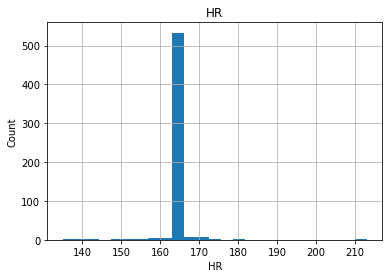

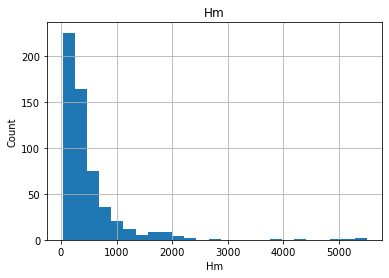

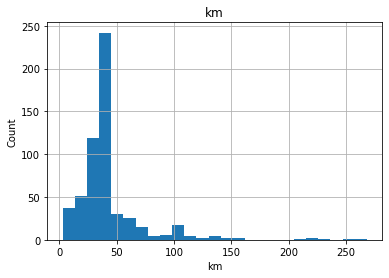

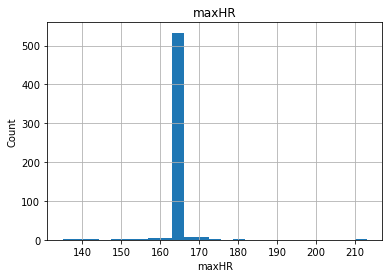

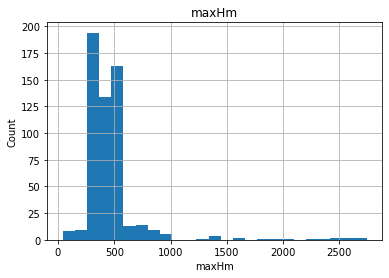

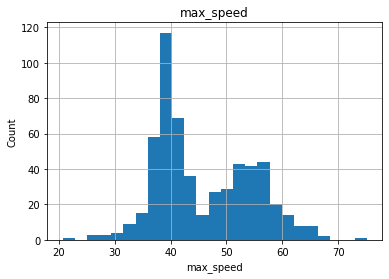

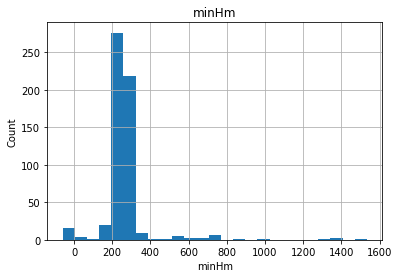

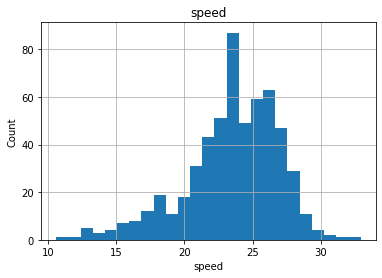

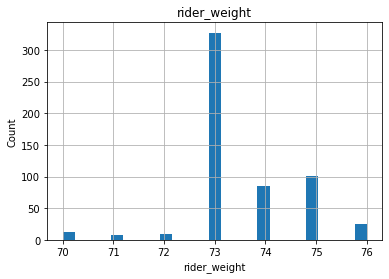

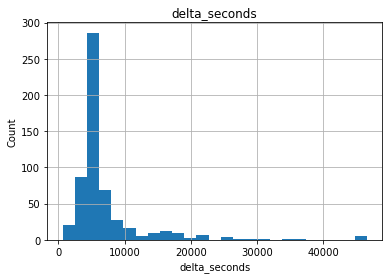

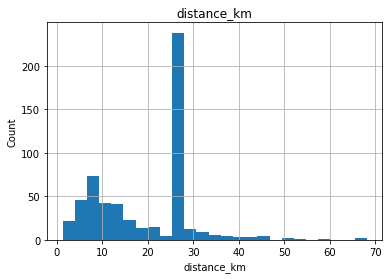

In [34]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in numerical_features:
    data=dataset1.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Since there is no gaussian distribution, we are dealing with skewed data. Here we have to normalize the data or, put differently, convert the skewed distribution to the gaussian distribution by using logarithmic transformation.

Also, one can see that rider_weight has discrete values.

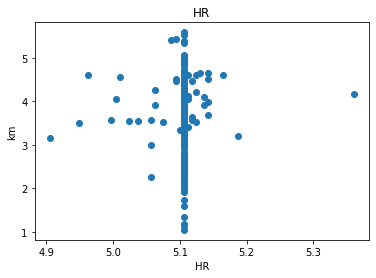

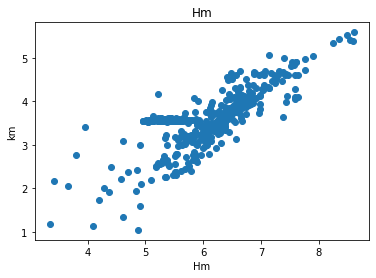

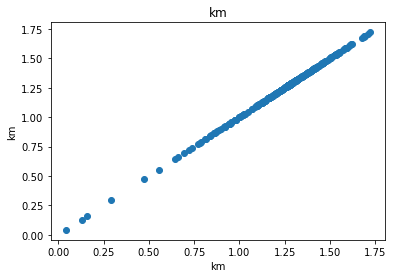

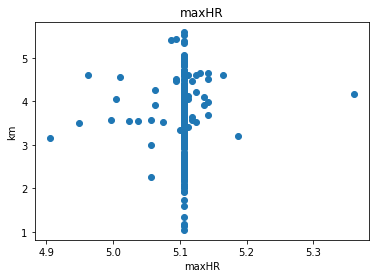

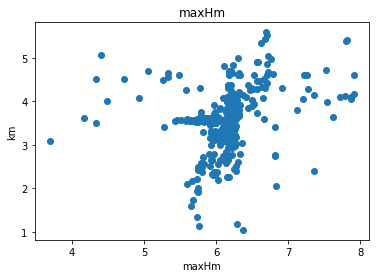

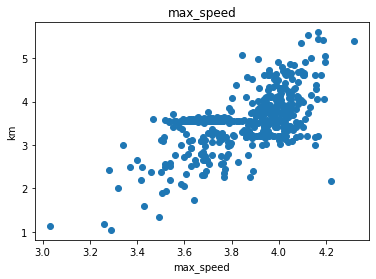

/Users/christianbinkert/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


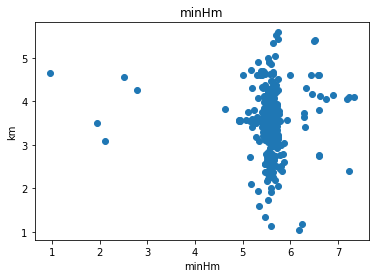

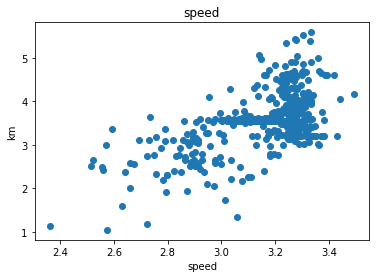

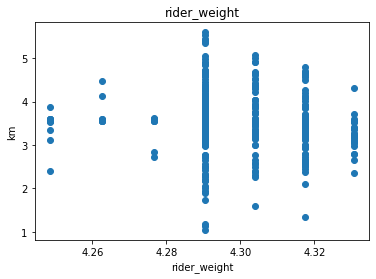

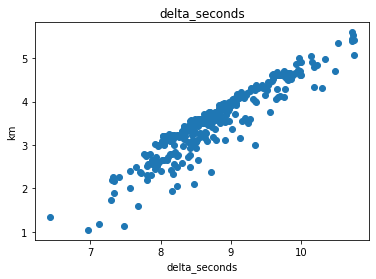

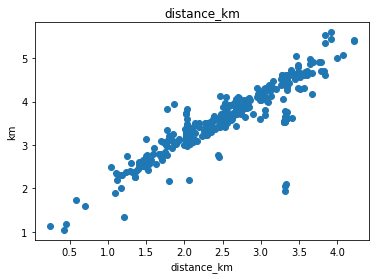

In [35]:
# We will be using logarithmic transformation

for feature in numerical_features:
    data = dataset1.copy()
    
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['km']=np.log(data['km'])
        plt.scatter(data[feature],data['km'])
        plt.xlabel(feature)
        plt.ylabel('km')
        plt.title(feature)
        plt.show()

After applying logarithmic transformation, we see that not all features correlate strongly with the dependent variable 'km'. 

Eypecially:
- 'minHm'
- 'rider_weight'
- 'HR' and
- 'maxHR' 

Have a weak correlation and might cause problems when we try to fit our function. After a final look at the correlation matrix in chapter 3, we'll decide whether to drop those variables.

### 1.3 Outliers

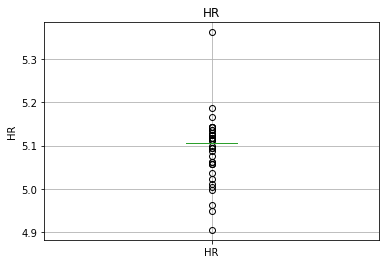

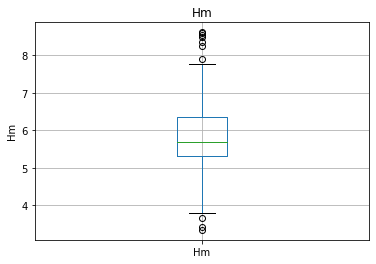

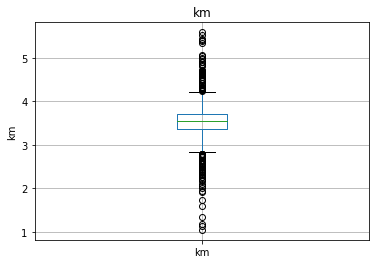

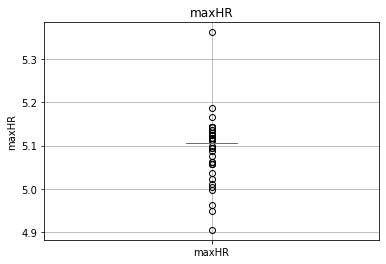

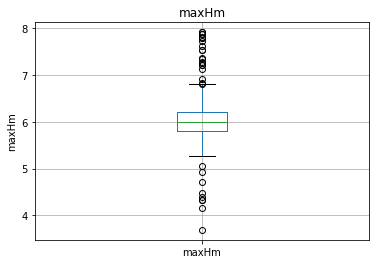

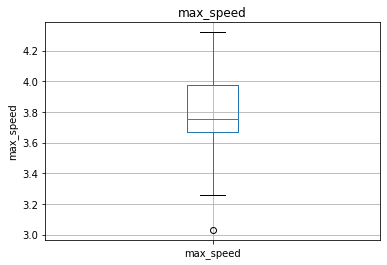

/Users/christianbinkert/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


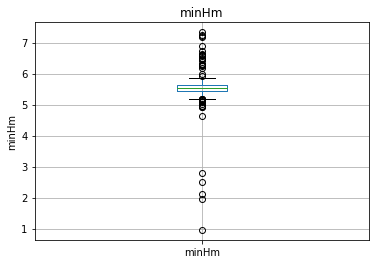

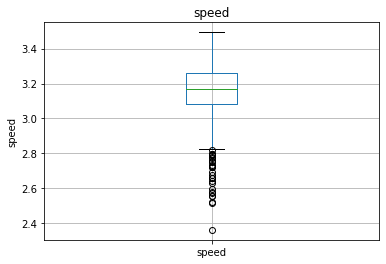

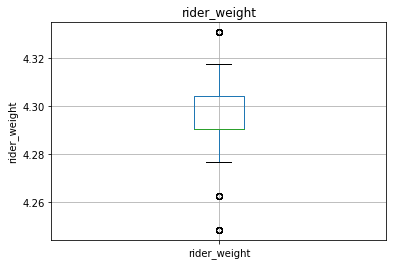

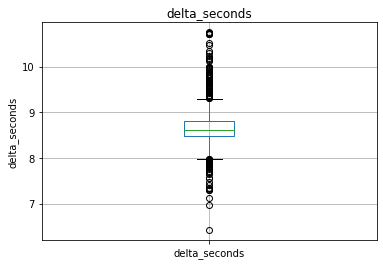

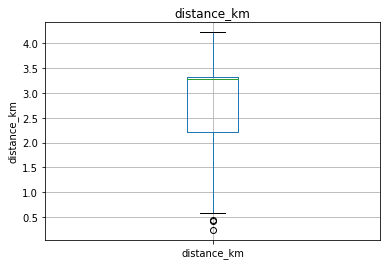

In [36]:
for feature in numerical_features:
    data = dataset1.copy()
    
    #Avoidong taking the log of negative values
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

By using the boxplot graphs, we can identify outliers. Looking at the data, we see that there are quite a lot of outliers. 
Academically, outliers should be deleted from the dataset if:
- We have a data entry error
- We have a data processing error
- If outliers are small in numbers

Since the outliers in the given dataset occur mainly if the 'ride_type' is 'Race', we decided to keep those outliers, as the values (Race = High km, delta_seconds, distance) are normal in this context.

### 1.4 Categorical Data

Similar to numerical data, we examine the relationship between the categorical data and the dependent variabel, too. One hypothesis we could uncover may be, that a certain bike type is usually present if more kilometers are done by the rider.

In [37]:
print(categorical_features)

#Display the amount of different values per feature
for feature in categorical_features:
    print('The feature is {} and numer of categories are {}'.format(feature,len(dataset1[feature].unique())))

['bike', 'type', 'ride_type']
The feature is bike and numer of categories are 7
The feature is type and numer of categories are 3
The feature is ride_type and numer of categories are 3


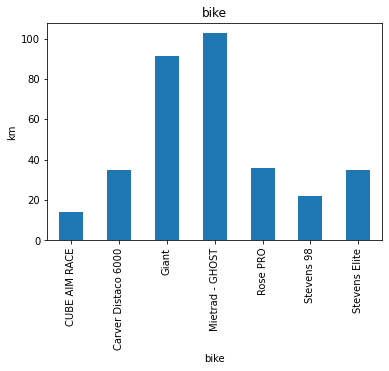

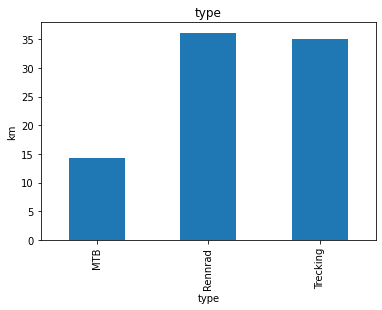

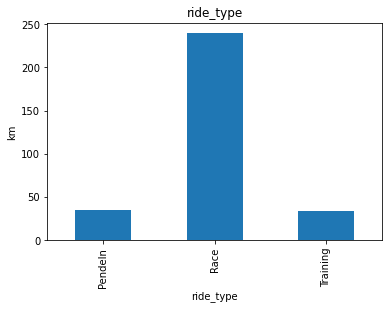

In [38]:
for feature in categorical_features:
    data=dataset1.copy()
    data.groupby(feature)['km'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('km')
    plt.title(feature)
    plt.show()

From the graphs above we can draw to conclusions: 
- Certain categorical features are positively correlated with 'kilometers'
- Due to the limited amount of different values for each categorical feature, one-hot encoding might do the trick when we futher convert the categorical data.

# 2. Feature Engineering

Some of the typical tasks that would fall into feature engineering were already covered in the Data Analysis part (i.e. "delta_seconds") but were applied earlier to have a complete picture of the data at hand. 
Hence, we are left with the following points.

2.1 Log transformation

2.2 One-hot-encoding

2.3 Scaling

### 2.1 Log transformation

Since we can only take the log for positive numerical values, we have to add a constant value to 'minHm' where we had some negative values.

In [39]:
dataset1['minHm'] = dataset1['minHm'] + 61.6


dataset1.describe()

,HR,Hm,km,maxHR,maxHm,max_speed,minHm,speed,rider_weight,delta_seconds,distance_km
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,164.873016,503.056437,41.691455,164.873016,475.392240,45.825803,327.043739,23.515755,73.530864,7172.952381,19.928413
std,3.309921,611.473943,30.994838,3.309921,320.197369,8.651778,137.570845,3.464559,1.114639,6136.667104,10.867328
min,135.000000,28.400000,2.835760,135.000000,40.000000,20.692800,1.000000,10.603103,70.000000,616.000000,1.271486
25%,165.000000,205.000000,28.645775,165.000000,329.700000,39.200400,292.100000,21.819928,73.000000,4799.000000,9.172213
50%,165.000000,293.000000,35.044020,165.000000,405.600000,42.728400,315.400000,23.722605,73.000000,5537.000000,26.669269
75%,165.000000,572.100000,40.476320,165.000000,496.000000,53.190000,338.800000,26.021343,74.000000,6704.500000,27.503854
max,213.000000,5508.800000,268.309280,213.000000,2745.400000,75.106800,1595.400000,32.917141,76.000000,46624.000000,68.178255


In [40]:
#Applying log transformation to obtain gaussian distribution (as we worked with a copy of the dataset before)

for feature in numerical_features:
    dataset1[feature]=np.log(dataset1[feature])
    
dataset1.head()

,HR,Hm,km,maxHR,maxHm,max_speed,minHm,speed,bike,type,rider_weight,ride_type,delta_seconds,distance_km
0,5.105945,4.903792,1.601184,5.105945,5.646859,3.430834,5.604330,2.629871,CUBE AIM RACE,MTB,4.304065,Training,7.677864,0.704243
1,5.105945,5.796665,2.407288,5.105945,6.281145,3.690758,5.998937,2.824959,CUBE AIM RACE,MTB,4.304065,Training,8.004366,1.362631
2,5.105945,5.961521,2.775968,5.105945,6.121176,3.717962,5.795450,2.843499,CUBE AIM RACE,MTB,4.304065,Training,8.246172,1.515467
3,5.105945,6.109692,3.102911,5.105945,6.149750,3.686527,5.692384,2.856638,CUBE AIM RACE,MTB,4.330733,Training,8.514189,2.079050
4,5.105945,5.310246,2.650648,5.105945,5.922114,3.397671,5.842965,2.522702,CUBE AIM RACE,MTB,4.330733,Training,8.535819,1.526109


In [41]:
dataset1.describe()

,HR,Hm,km,maxHR,maxHm,max_speed,minHm,speed,rider_weight,delta_seconds,distance_km
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,5.104977,5.865844,3.550000,5.104977,6.052167,3.807209,5.702528,3.145362,4.297590,8.687203,2.789559
std,0.019937,0.769850,0.593511,0.019937,0.432357,0.188124,0.538368,0.162846,0.015170,0.561391,0.707506
min,4.905275,3.346389,1.042310,4.905275,3.688879,3.029786,0.000000,2.361147,4.248495,6.423247,0.240186
25%,5.105945,5.323008,3.355005,5.105945,5.798183,3.668687,5.677096,3.082824,4.290459,8.476163,2.216029
50%,5.105945,5.680173,3.556605,5.105945,6.005367,3.754864,5.753842,3.166428,4.290459,8.619208,3.283512
75%,5.105945,6.349301,3.700716,5.105945,6.206576,3.973870,5.825410,3.258917,4.304065,8.810532,3.314326
max,5.361292,8.614102,5.592140,5.361292,7.917682,4.318911,7.374880,3.493994,4.330733,10.749871,4.222126


### 2.2 One Hot Encoding

So far, the relevant categorical data that showed a correlation with the dependent variable is still stored as object type. Since we can only process numerical data, we need to convert those data points by using label encoding or one hot encoding.

While label encoding is typically used when there are many different values for the features at hand or there is an ordinal relation, we can use one hot encoding as we deal with rather few values where we don't have ordinality.

In [42]:
#Applying OHE to the categorical columns and dropping the first dummy-column to avoid multicollinarity
dataset1_ohe = pd.get_dummies(dataset1, columns = categorical_features, drop_first=True)

print(dataset1_ohe.columns)
dataset1_ohe.tail()

Index(['HR', 'Hm', 'km', 'maxHR', 'maxHm', 'max_speed', 'minHm', 'speed',
       'rider_weight', 'delta_seconds', 'distance_km',
       'bike_Carver Distaco 6000', 'bike_Giant', 'bike_Mietrad - GHOST',
       'bike_Rose PRO', 'bike_Stevens 98', 'bike_Stevens Elite',
       'type_Rennrad', 'type_Trecking', 'ride_type_Race',
       'ride_type_Training'],
      dtype='object')


,HR,Hm,km,maxHR,maxHm,max_speed,minHm,speed,rider_weight,delta_seconds,...,bike_Carver Distaco 6000,bike_Giant,bike_Mietrad - GHOST,bike_Rose PRO,bike_Stevens 98,bike_Stevens Elite,type_Rennrad,type_Trecking,ride_type_Race,ride_type_Training
562,5.105945,5.324959,3.602838,5.105945,5.856217,3.717962,5.744284,3.165872,4.290459,8.607217,...,0,0,0,0,0,1,0,1,0,0
563,5.105945,5.025195,3.557345,5.105945,5.794232,3.670430,5.702448,3.165368,4.290459,8.560061,...,0,0,0,0,0,1,0,1,0,0
564,5.105945,5.657389,3.555397,5.105945,5.950122,3.670430,5.758902,3.167442,4.290459,8.557567,...,0,0,0,0,0,1,0,1,0,0
565,5.105945,5.342334,3.604446,5.105945,5.833640,3.593964,5.726848,3.084888,4.262680,8.708309,...,0,0,0,0,0,1,0,1,0,0
566,5.105945,5.475626,3.556238,5.105945,6.030685,3.733403,5.800304,3.165634,4.276666,8.585973,...,0,0,0,0,0,1,0,1,0,0


### 2.3 Feature Scaling

As our dataset contains several float values that contain different measures (km = Kilometers, max_speed = km/h,..) we scale those values down to have values between zero and one by using MinMaxScaler.

In [43]:
#Leaving out the dependent variable
feature_scale=[feature for feature in dataset1_ohe.columns if feature not in ['km']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset1_ohe[feature_scale])

MinMaxScaler()

In [44]:
#By applying the transformation to the respective data, we get an array back. 
scaler.transform(dataset1_ohe[feature_scale])

array([[0.44005054, 0.29565071, 0.44005054, ..., 0.        , 0.        ,
        1.        ],
       [0.44005054, 0.46514993, 0.44005054, ..., 0.        , 0.        ,
        1.        ],
       [0.44005054, 0.49644534, 0.44005054, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.44005054, 0.43871037, 0.44005054, ..., 1.        , 0.        ,
        0.        ],
       [0.44005054, 0.37890165, 0.44005054, ..., 1.        , 0.        ,
        0.        ],
       [0.44005054, 0.40420525, 0.44005054, ..., 1.        , 0.        ,
        0.        ]])

In [45]:
# We take the array and convert it again to a dataframe, adding the dependent variable HM
df = pd.concat([dataset1_ohe[['km']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset1_ohe[feature_scale]), columns=feature_scale)],
                    axis=1)

#Note, that all independent variables are now scaled to values between 0 and 1. 
df.head()

,km,HR,Hm,maxHR,maxHm,max_speed,minHm,speed,rider_weight,delta_seconds,...,bike_Carver Distaco 6000,bike_Giant,bike_Mietrad - GHOST,bike_Rose PRO,bike_Stevens 98,bike_Stevens Elite,type_Rennrad,type_Trecking,ride_type_Race,ride_type_Training
0,1.601184,0.440051,0.295651,0.440051,0.463010,0.311101,0.759922,0.237212,0.675719,0.289976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.407288,0.440051,0.465150,0.440051,0.613002,0.512729,0.813428,0.409422,0.675719,0.365439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.775968,0.440051,0.496445,0.440051,0.575174,0.533832,0.785836,0.425788,0.675719,0.421327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.102911,0.440051,0.524574,0.440051,0.581931,0.509447,0.771861,0.437386,1.000000,0.483273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.650648,0.440051,0.372810,0.440051,0.528101,0.285376,0.792279,0.142610,1.000000,0.488273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
df.to_csv('train.csv')